# ***Final Project - Machine Learning***

<br>




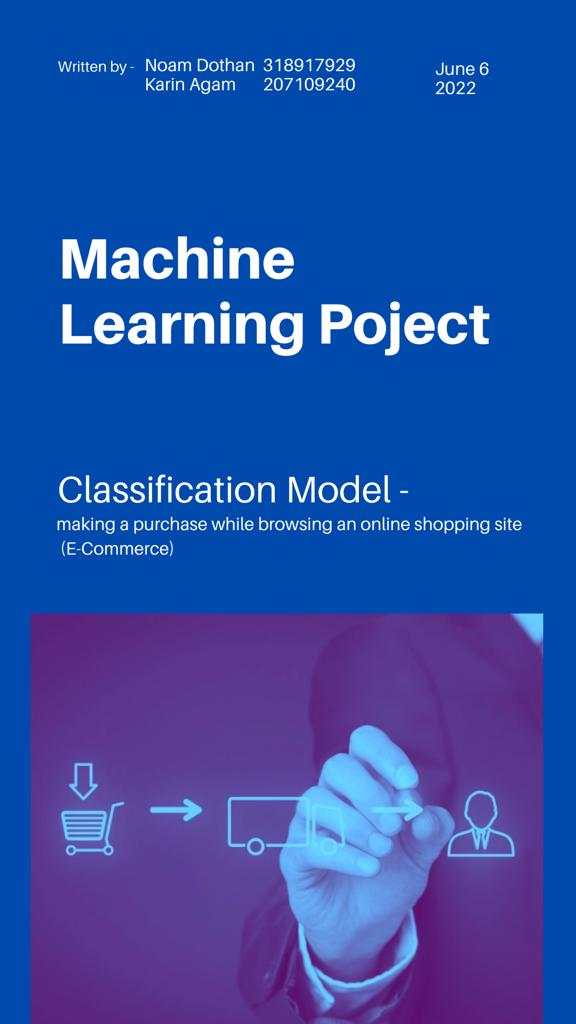

## ***About our project:***<br>

***Given information about users of an online shopping site (E-Commerce), we were asked to build a model that predicts what is the chance of a particular user, to purchase while browsing the site.***<br><br>
Based on 10,479 observations that were indicated whether a purchase was made or not.<br>
We will research and process the data, train models, and pick the best one to predict the test data.<br><br>

***Hope you will enjoy our project as much as we do.***<br>

### Table of Contents: <a class="anchor" id="top0"></a> <a class="anchor" id="top1"></a> <a class="anchor" id="top2"></a>
<a class="anchor" id="top3"></a> <a class="anchor" id="top4"></a><a class="anchor" id="top5"></a><a class="anchor" id="top6"></a>

* [Part 0: Loading the data ](#Part0)
<br>

* [Part 1: Exploring the Data](#Part1)
<br>

* [Part 2: Pre Processing](#Part2)
<br>

* [Part 3: Modeling](#Part3)
<br>

* [Part 4: Model Evaluation](#Part4)
<br>

* [Part 5: prediction](#Part5)
<br>


# Imports

In [1]:
import numpy as np
import pandas as pd
from calendar import month_name
import seaborn as sns
from seaborn import distplot
from numpy import interp
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.lines import Line2D
import scipy as sp
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

# Part 0: Loading The Data <a class="anchor" id="Part0"></a>


In [2]:
# Data Loading
data = pd.read_csv('train.csv',index_col = 0)
labels = data['purchase']
train_data = data.copy()
test_data = pd.read_csv('test.csv',index_col = 0)


[Get back to the top ](#top0)

<br><br>
# Part 1: Exploring the Data <a class="anchor" id="Part1"></a>



First, we want to make sure that there are no duplicates in our data

In [3]:
train_data.shape

(10479, 22)

In [4]:
# We cannot assumed there is no duplicate seesions on our data, we want to make sure  there are no duplicate lines in the 'train' file. 
# We want to do so only on the 'train' file and not on the 'test' one. This is because it is not possible to know about the "test" file due to the missing label ('purchase') column.
train_data = train_data.drop_duplicates() # checking for duplicates


In [5]:
train_data.shape
# We can see there are no duplicates in our data.

(10479, 22)

In [6]:
# Now lets move out the labels column from our data
train_data.drop('purchase',inplace=True,axis=1)

 ## Little Glimpse at our data: <br>

***How does our data behave?***<br>Even before performing any action, we would like to examine the data and examine closely each feature in order to plan the next steps and draw important conclusions.<br> 
To do so, we chose to focus on several topics which we would like to handle later: outliers, missing values, normalization,<br> dimensionality, dealing with categorical variables, and examining options for developing new features and mathematical manipulation of the existing features.<br>
<br><br>
We chose to start by seeing what the data looks like in a preview



In [7]:
# Lets see how out data look likes
train_data.head()

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,...,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,...,Feb,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN
1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,0.0,...,Feb,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN
2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,0.0,...,Feb,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN
3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,0.0,...,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN
4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,...,Feb,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN


In [8]:
# using describe to see more information on the data
train_data.describe()

,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D
count,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000
mean,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440
std,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571
25%,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657
50%,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221
75%,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061
max,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254


#### Let's see the types of our features - 


In [9]:
train_data.dtypes

num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration        object
num_of_product_pages     float64
product_page_duration     object
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
dtype: object

**We noticed that:**
<br><br>

The columns 'info_page_duration' and 'product_page_duration' are with numeric values with a combination of time units, which already at this stage can be converted and cleaned in order to become numeric instead of an object.
<br><br>

In addition, some of the numeric variables - 'device' and 'Region', are actually categorical where each numeric value represents a category. This is a potential problem later on because the categories are kind of "weighted" - a category with a higher value does not necessarily mean that we want it to be given more weight in the calculation of the model.
We would like to address this later in our data's pre-processing.
<br><br>

Moreover, we were able to gather a little information about column "C". Its values ​​are in the form of a log which is the automatically produced and time-stamped documentation of events relevant to a particular system. We will keep that in mind for further data analysis.
<br><br>

We can see that the features 'internet_browser', 'A', and 'C' seem to be problematic since they appeared to have many categories.
Furthermore, we can notice that we have missing values in several columns.
<br><br>


In [10]:
# Checking if 'internet_browser','A' and 'C' are problamtic categorical wise

for cat in ['internet_browser','A' , 'C']:
    print(train_data[cat].value_counts())

chrome_89         1117
chrome_99.1.3     1101
chrome_99.1.4     1080
chrome_98.0.1     1078
chrome_90.1.7     1038
                  ... 
browser_7_v13        1
browser_13_v11       1
browser_7_v10        1
browser_12_v16       1
browser_12_v18       1
Name: internet_browser, Length: 126, dtype: int64
c_2        3101
c_1        1944
c_3        1644
c_4         850
c_13        586
           ... 
c_20_51       1
c_20_83       1
c_20_29       1
c_20_28       1
c_20_80       1
Name: A, Length: 96, dtype: int64
log200     1813
log400     1760
log404     1754
log8080    1748
log_100    1731
log202     1650
Name: C, dtype: int64


#### So are they problematic?
<br>

Column 'C' contains 84 categories, in the same way, Column 'A' contains 94 categories, and Column 'internet_browser' contains <br>126 categories, most of the columns' categories appear only a few times. Turning each category into a Dummy feature is problematic because of the Curse of Dimensionality.<br>
On the other hand, we want to preserve as much data as we can keep in mind the fact that we only have prior information about the 'internet_browser' feature.<br>
<br>

We notice that every sample starts with the browser's name following the browser's version. Because we have a lot of versions, <br>we assume that the version number is insignificant compared to <br>
the effect of many categories to handle. Hence, we decided to remove the browser's version of each sample and remain with only the browser's name.<br>
<br>

Regarding columns 'A' and 'C, we will remove the 'c_' and 'log_' and 'log' correspondingly because they don't add needed <br>information to the values.<br>
As a result of the above, we can now transform the type of the features to numeric from an object.<br>
Keeping in mind these are anonymous features, we cannot find a rational explanation for the adding values of those features to <br>our model. Hence, we don't reduce the number of categories but we want to simplify the visualizations for further exploration.

We tested the types of features - We have two types of features - numeric and object. We understand that the type representing<br> the columns does not necessarily indicate their actual behavior. We will address this later. <br><br>Note that there are several columns on which we have no preliminary information - columns "A", "B", "C" and "D". Therefore, priority in decision making and information analysis will be given to non-anonymous features.



### Lets tidy the data and visulaize it after:
<br>

Already at this stage, we will make adjustments that will make it easier for us to understand the features and the future models for some of the features. We will address the problematic categorical features as we mentioned above.

In [11]:
# This function will helps us remove some charts in the data that we don't
# want. we using this function to handle the issue with the 'info_page_duration',
# 'product_page_duration' minutes problem, and etc..

def drop_by_char_one_column(data_name, col_name, len_rows, until_char_remove = None, from_char_remove = None, option = 0):
    
    """
    This function goes threw all the rows in a given column an drops the end of the string by the 
    first apperrence of given character (or the start till first apperrence)
    
    The function returns the change copy of the data
    option 0 the defult - mean not changing the data type
    option 1 - changing the data type to float
    
    """
    data_name_c = data_name.copy()
     
    # getting the index of the given column
    index_col = data_name_c.columns.get_loc(col_name)
    
    # Lopping threw all the rows in the given column
    for index_row in range(len_rows):

        string = data_name_c.iloc[index_row, index_col]
        
        # makimg sure we dont try to change null values
        if  (pd.notnull(string)) :
            
            # dropping the end of the string by the first apperrence of
            # given character - until_char_remove
            if (until_char_remove != None) :
                string = string[:string.find(until_char_remove)]
                
            if (from_char_remove != None) :
                
                index = string.find(from_char_remove) + len(from_char_remove)
                string = string[index:] 
                
            # changing the value of the data itself to the new string
            data_name_c.iloc[index_row, index_col] = string
    if option == 1:
        data_name_c[col_name] = data_name_c[col_name].astype(float)  
            
    return data_name_c

In [12]:
# tyding the data function(relevant to all data):

def data_tidying( dataframe ):
    """
    This function is responsiable for cleaning and tyding all the data.
    
    """
    df = dataframe.copy()
    
    # Changing the info_page_duration and the product_page_duration columns into numeric:
    
    len_rows = df.shape[0]
    
    df = drop_by_char_one_column( df, 'info_page_duration', len_rows, until_char_remove = " ", option = 1 )
    df = drop_by_char_one_column( df, 'product_page_duration', len_rows, until_char_remove = " ", option = 1 )
    
    # Changing internet_browser column into less categories based on the main characteristics:
    df = drop_by_char_one_column( df, 'internet_browser', len_rows, '_')
  

    # Changing C column of string of 'Log' to the actual number
    # We want only the number in each value to stay, we'll remove both log and _ :
    
    df['C'] = df['C'].astype(str)
    df['C'] = df['C'].map(lambda x: x.lstrip('log'))
    df['C'] = df['C'].map(lambda x: x.lstrip('_'))
    
    # Now we can change the column type to float
    df['C'] = df['C'].astype(float)
    
    
    # Changing A colum of string of 'c_' to the actual number
    # We want only the number in each value to stay, we'll remove c_ :
    
    df['A'] = df['A'].astype(str)
    df['A'] = df['A'].map(lambda x: x.lstrip('c_'))
   
    
    # Now we can change the column type to float
    df['A'] = df['A'].astype(float)
    
    return df



In [13]:
# tyding the data as we mentioned:
train_data = data_tidying(train_data)

In [14]:
# Now lets check if our tidy function worked properly-
train_data.dtypes


num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration       float64
num_of_product_pages     float64
product_page_duration    float64
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                        float64
B                        float64
C                        float64
D                        float64
dtype: object

As we can see it worked as we expected,<br> now for the next part-

# Visualizations

We would like to know how each feature is distributed. We examined the different distributions according to the behavior of the variables.



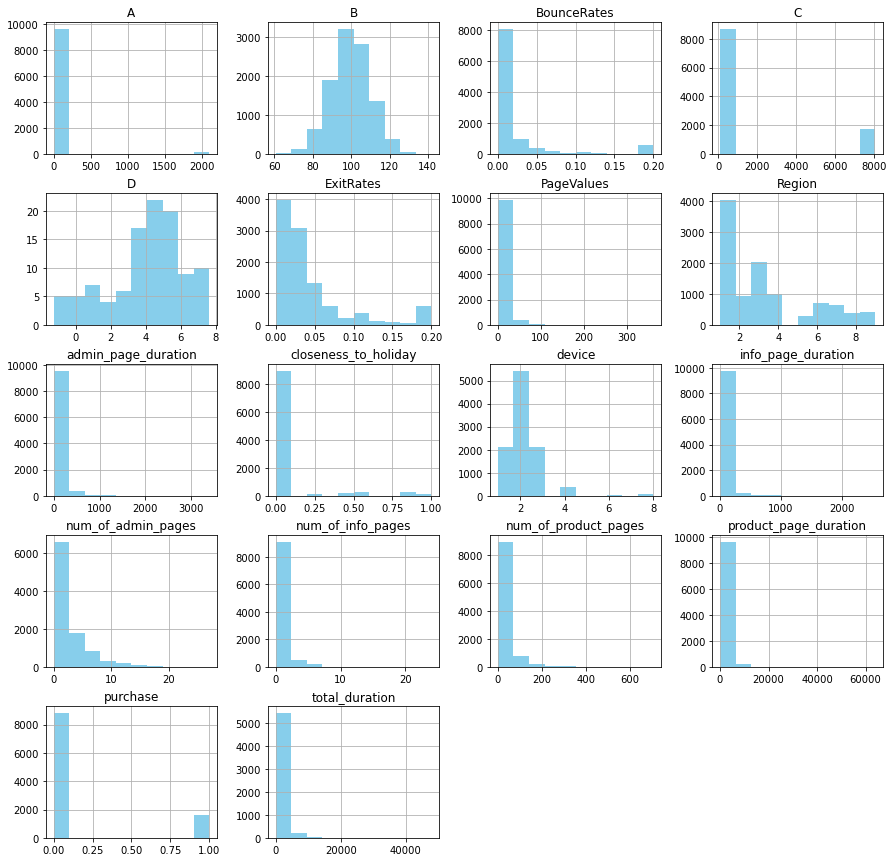

In [15]:

colors = ['springgreen', 'teal','firebrick', 'orangered', 'lightsalmon','salmon', 'chocolate', 'crimson', 'darkorchid',\
          'orchid','mediumaquamarine','deepskyblue', 'skyblue', 'lightseagreen','yellowgreen', 'darkcyan',\
          'steelblue', 'dodgerblue', \
         'cornflowerblue', 'royalblue']

pd.concat([train_data,labels],axis=1).hist(figsize=(15,15), color  = 'skyblue')

plt.show()

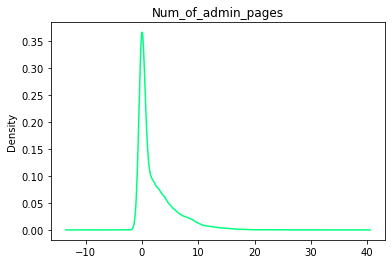

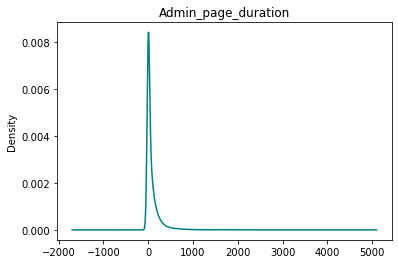

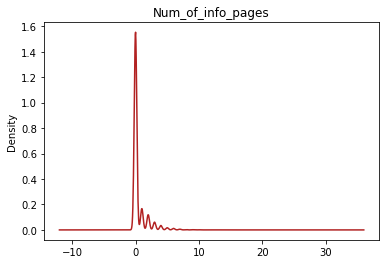

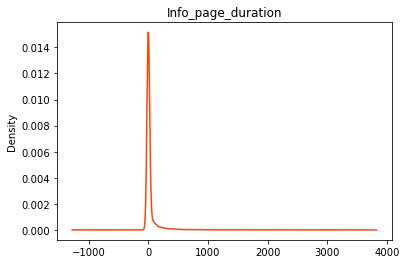

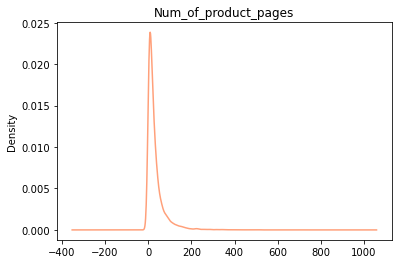

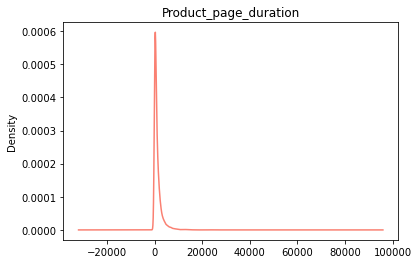

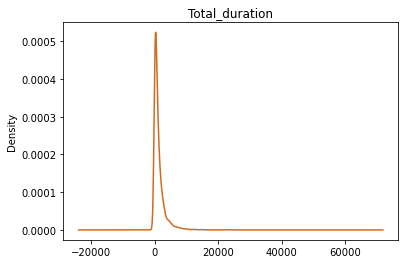

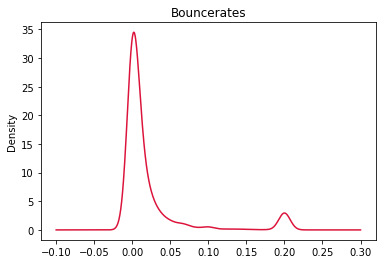

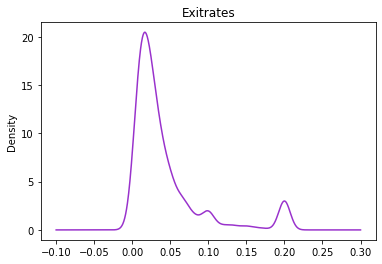

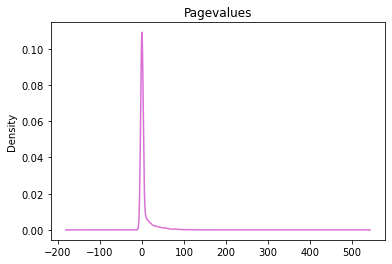

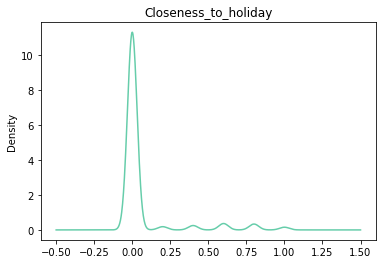

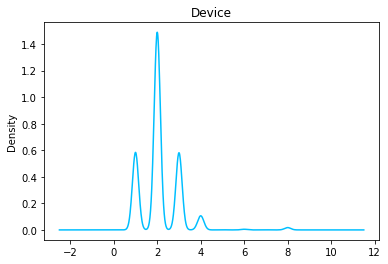

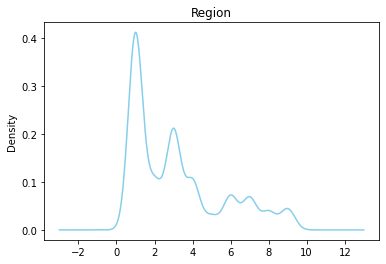

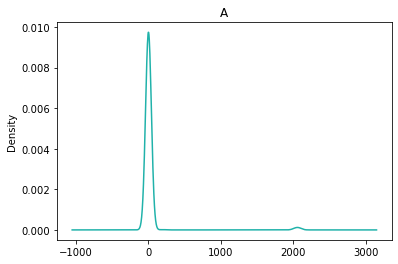

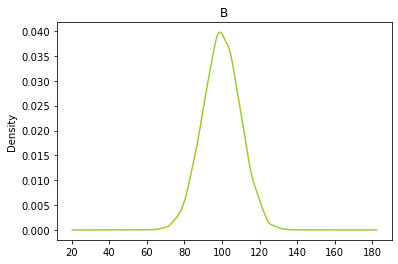

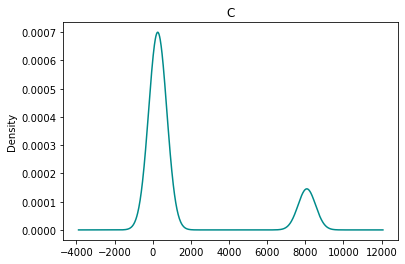

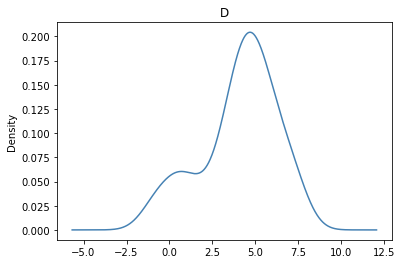

In [16]:
# function that create distrbutaion graph for all the numeric features
def create_disrbution_graph(df):
    for i, col in enumerate(df.select_dtypes(include=[float,int])):
        df[col].plot.density(color = colors[i])
        plt.title(col.capitalize())
        plt.show()
create_disrbution_graph(train_data)

We have seen that except for column "B" which looks like a gaussian distribution and therefore a normal distribution can be assumed, the rest of the features do not meet the requirement for normal distribution. Columns with categorical values ​​received kind of peaks and therefore do not distribute normally while other columns' means aren't in the center of the distribution, or have 2 significant peaks in the data.


Regarding the 2 peaks in "ExitRates", "BounceRates", "C" and "D" columns, given the fact that we have no additional information other than the existing data, the existence of 2 peaks in the data can indicate 2 different distributions with different expectations according to the peaks' centers.
<br>

We tried to see by using the categorical features given to us, and in particular those with 2 categories, whether this division into the 2 expectations really exists.
<br>

#### But first, let's see the categorial features- 


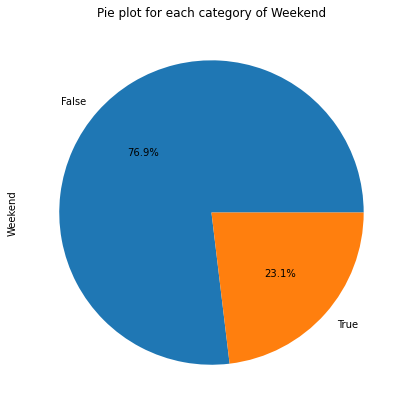

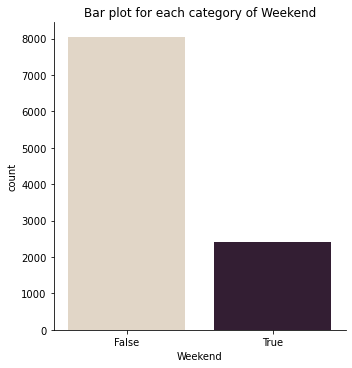

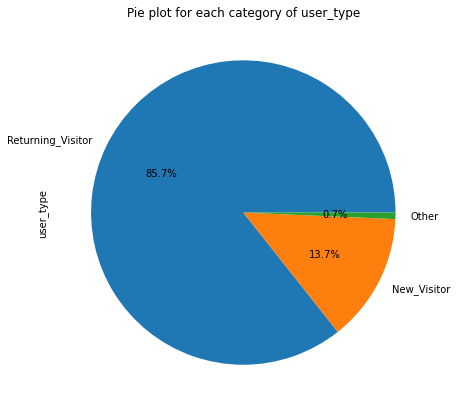

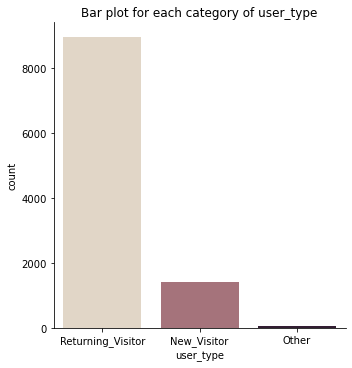

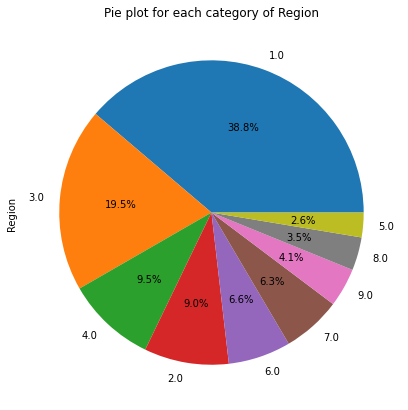

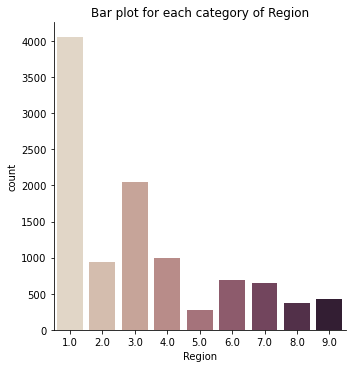

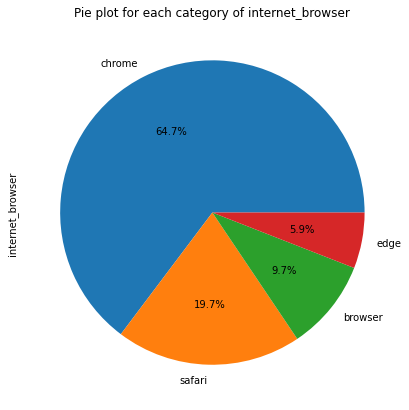

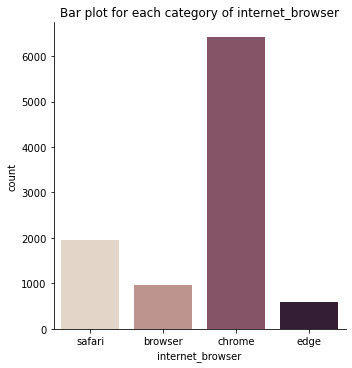

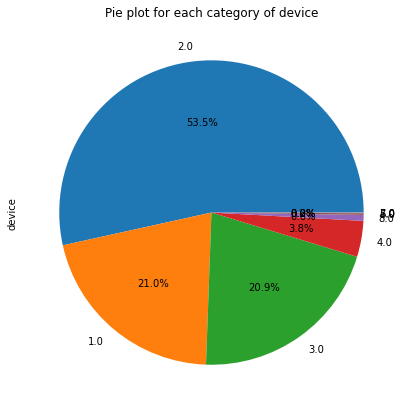

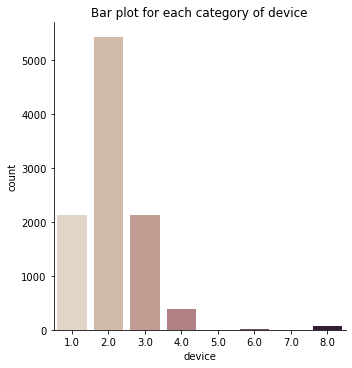

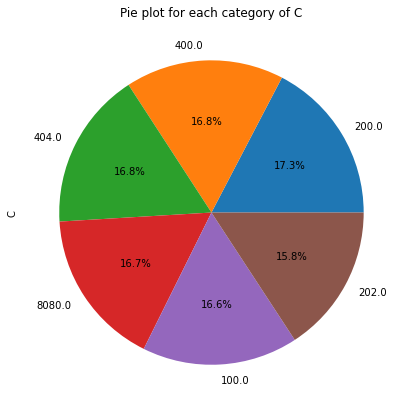

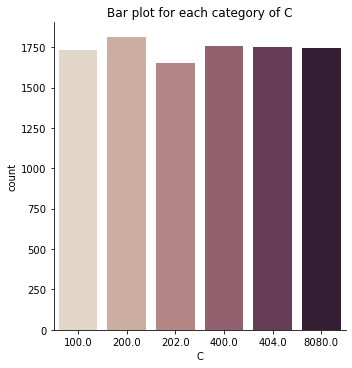

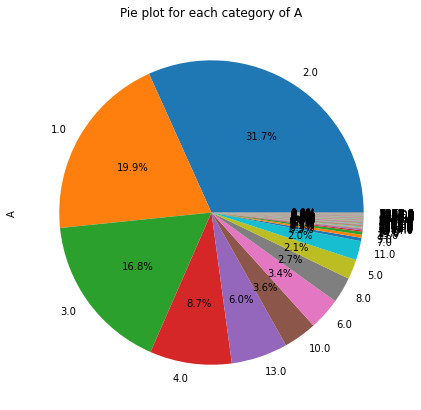

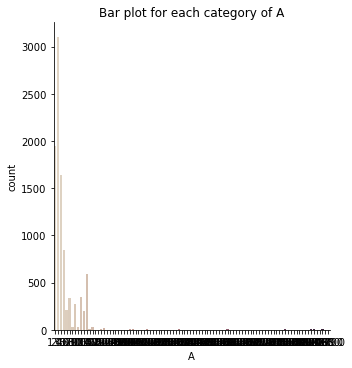

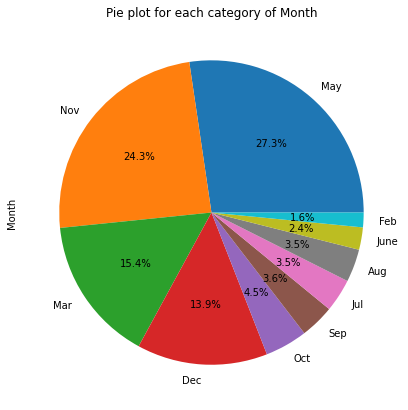

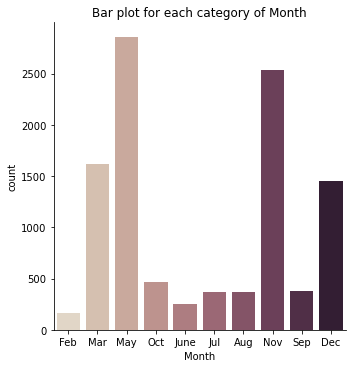

In [17]:

def plot_categotical_col(df, col_list):
    
    for col in col_list:    
        plt.figure(figsize = (12,7))
        # pie plot
        df[col].value_counts().plot(kind='pie', label= col, autopct='%1.1f%%').set(title='Pie plot for each category of ' + col)
        # bar plot
        sns.catplot(x = col ,kind = "count", palette = "ch:.25", data = train_data ).set(title='Bar plot for each category of ' + col)
        plt.show()
        
        
col_list = ['Weekend', 'user_type', 'Region', 'internet_browser', 'device', 'C', 'A', 'Month' ]
plot_categotical_col( train_data ,col_list )

<br>We can see that in features 'user_type', 'Month', 'Region', and 'device' we have some categories with a small share of the total data (below 5%). <br><br>
It may cause problems later since we want to represent each category in our model but there are much fewer data in the 'test' file and in the validation data that we will use later on.
Another reason, multiple categories can cause a significant increase in the dimension of the model when handled as dummies and may cause overfitting.<br><br> 
When handled differently, with transformation basis on measures we will decide on later, it may distort the data after the transformation.
<br><br>
Since features 'A' and 'C' are anonymous and we have a lot of categories for each one as we mentioned previously we cannot rationally minimize the categories.<br>
We noticed that after tidying the data, column 'C' was supposed to have 84 categories but was plotted with much less. Hence, we cannot refer to its plots.
We will address these issues later.
<br><br><br>

**Now that we have a better sense of how the categorical features look like,** <br>
we will try to perform what we mentioned above,
looking for a division of 2 or 3 distributions according to the number of peaks in the data<br><br>

In [18]:
def plot_hist_by_other_col( data_frame, col_name, col_lst):
    for col in col_lst:
        sns.displot(data_frame, x = col_name, hue= col, kind="kde", fill=False, bw_adjust=.8)
        plt.show()


Plotting BounceRates's divided distributions-


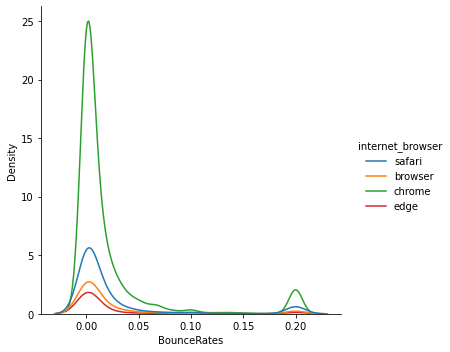

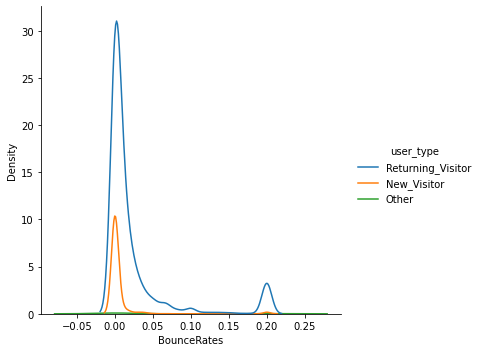

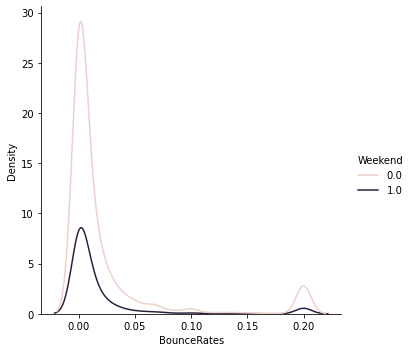

Plotting ExitRates's divided distributions-


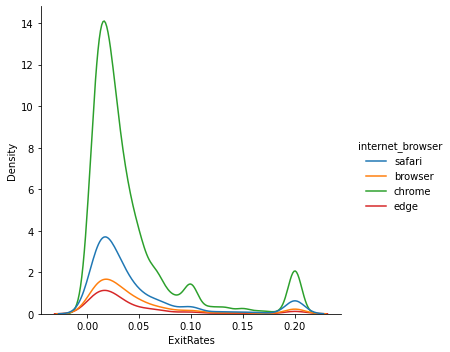

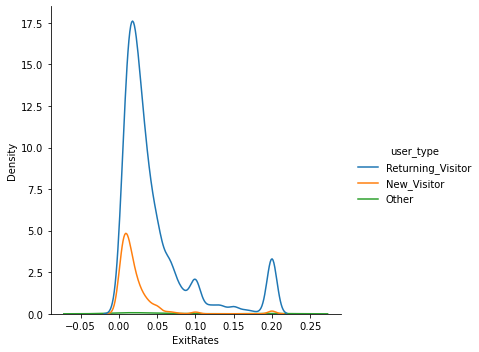

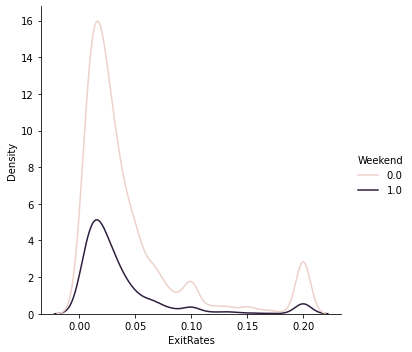

Plotting C's divided distributions-


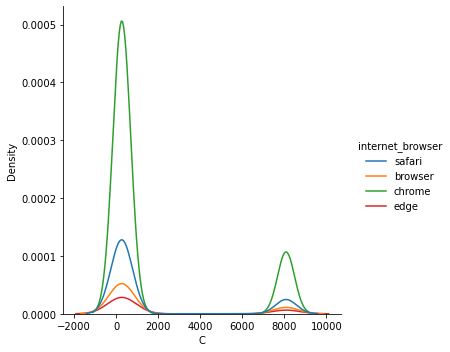

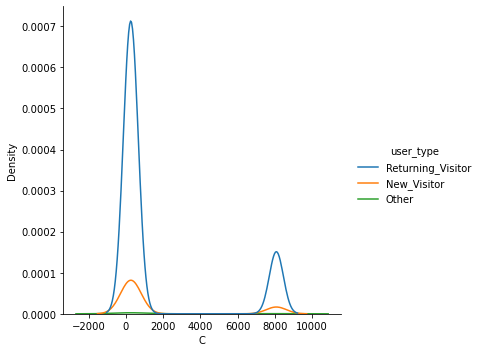

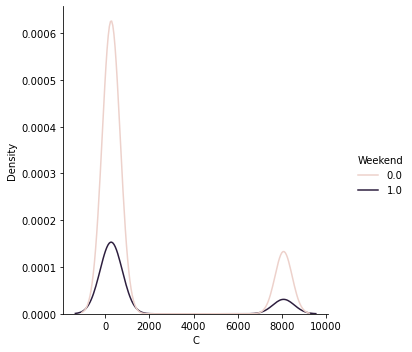

Plotting D's divided distributions-


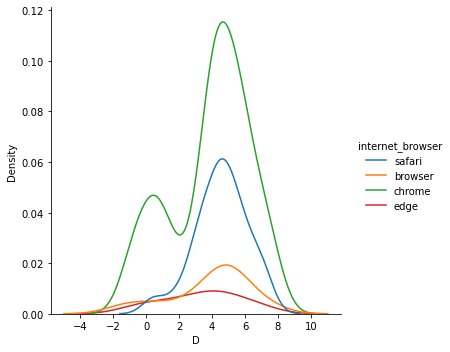

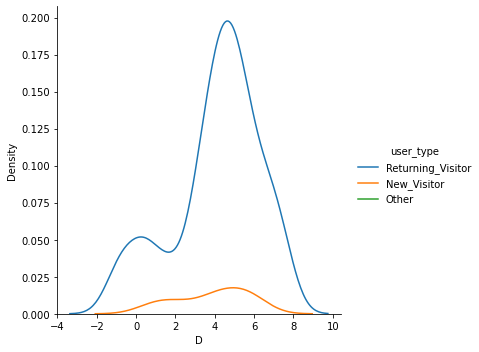

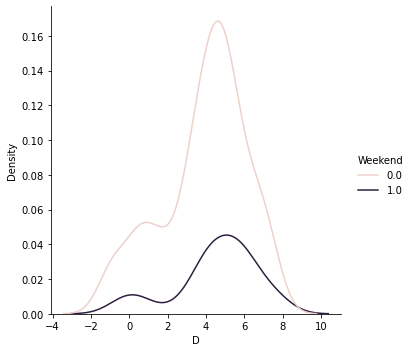

In [19]:
list_of_categorial =  ["internet_browser","user_type" ,"Weekend"]
list_of_two_peaks_col = [ 'BounceRates','ExitRates', 'C', 'D']

for col in list_of_two_peaks_col:
    print("Plotting "+col+"'s divided distributions-" )
    plot_hist_by_other_col( train_data, col, list_of_categorial)

We couldn't find what we've been looking for, there are no divisions that match the peaks in the data.

It now remains to be assumed that this may be the case but we can not say that these columns are normally distributed.

<br><br>
We can see that only features 'B' distribute close to normal and we can use some technics that base on the distribution to remove the outliers from this feature.
<br>

## Outliers visualizations:

We will now deal with Outliers. 
<br>

We chose to identify the outliers using the "BOXPLOT" visualization. We will also note that only a few columns are normally distributed. Hence, the outliers of the features which are not distributed normally cannot be identified by the boxplot visualization. But we can get a sense of the mean and some additional values ​​that exist in each feature.



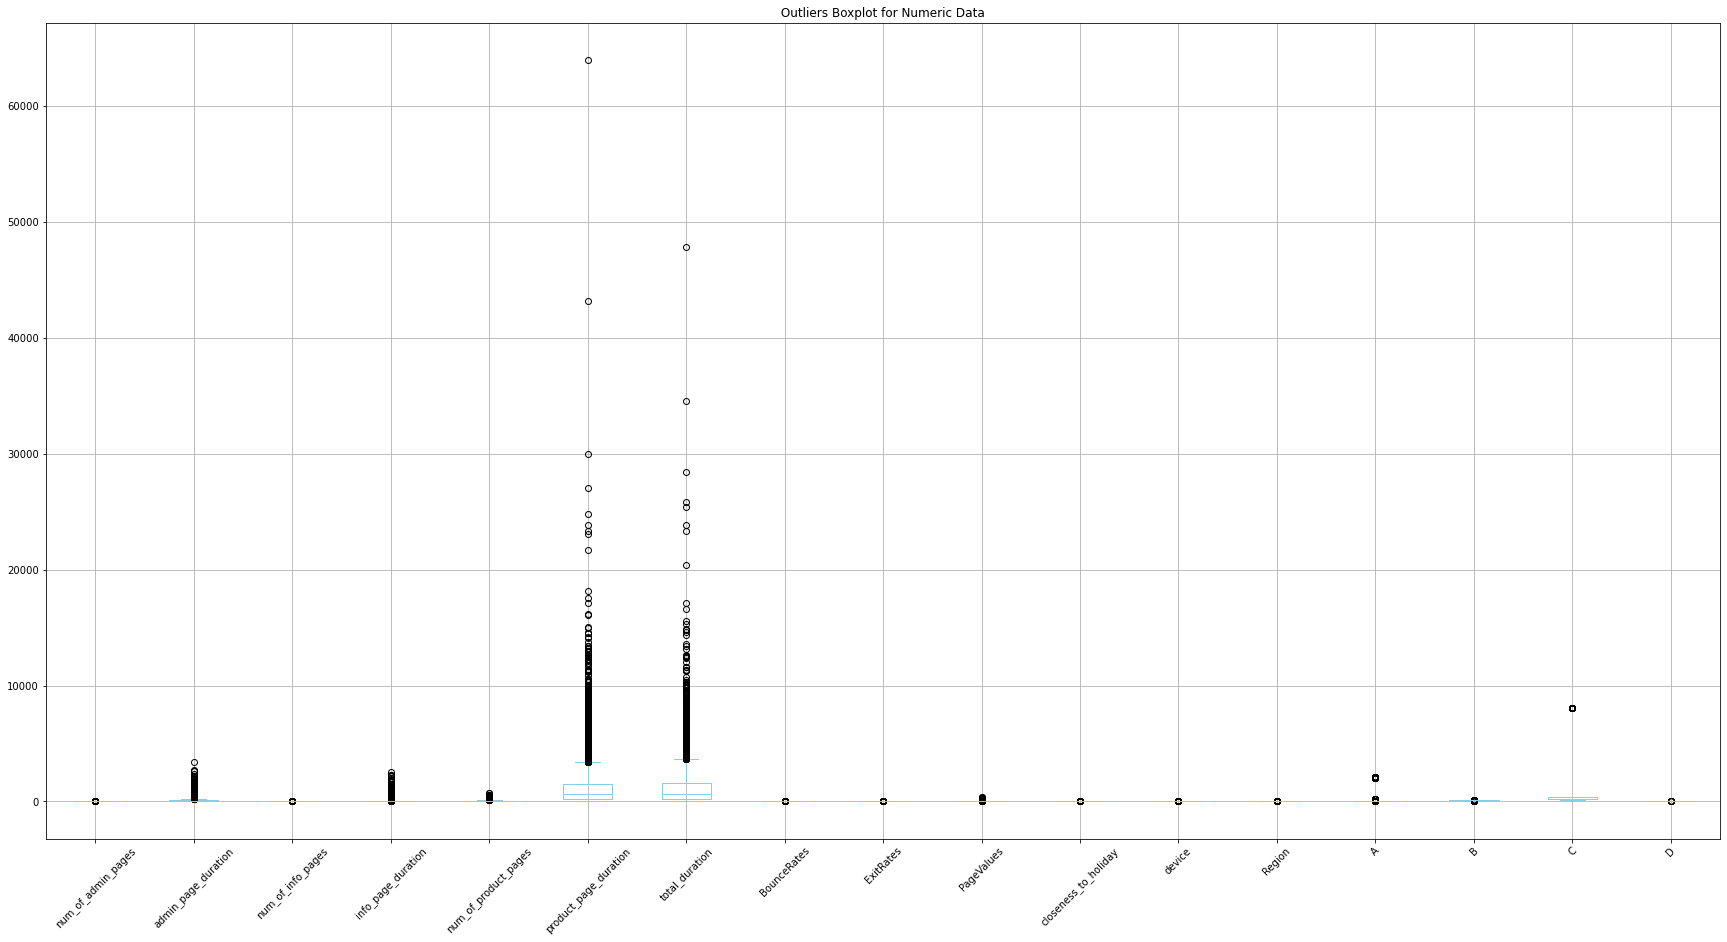

In [20]:
#make a data frame of numeric data only.
df_num = train_data.copy()
df_num = df_num.select_dtypes(include='number')
# boxplot with outliers
boxplot = df_num.boxplot(rot=45, figsize = (30,15), color  = 'skyblue').set_title(' Outliers Boxplot for Numeric Data ')


<br>
From a first glimpse we can see most of the features have outliers,<br> 

**let's get down to details-**
<br>

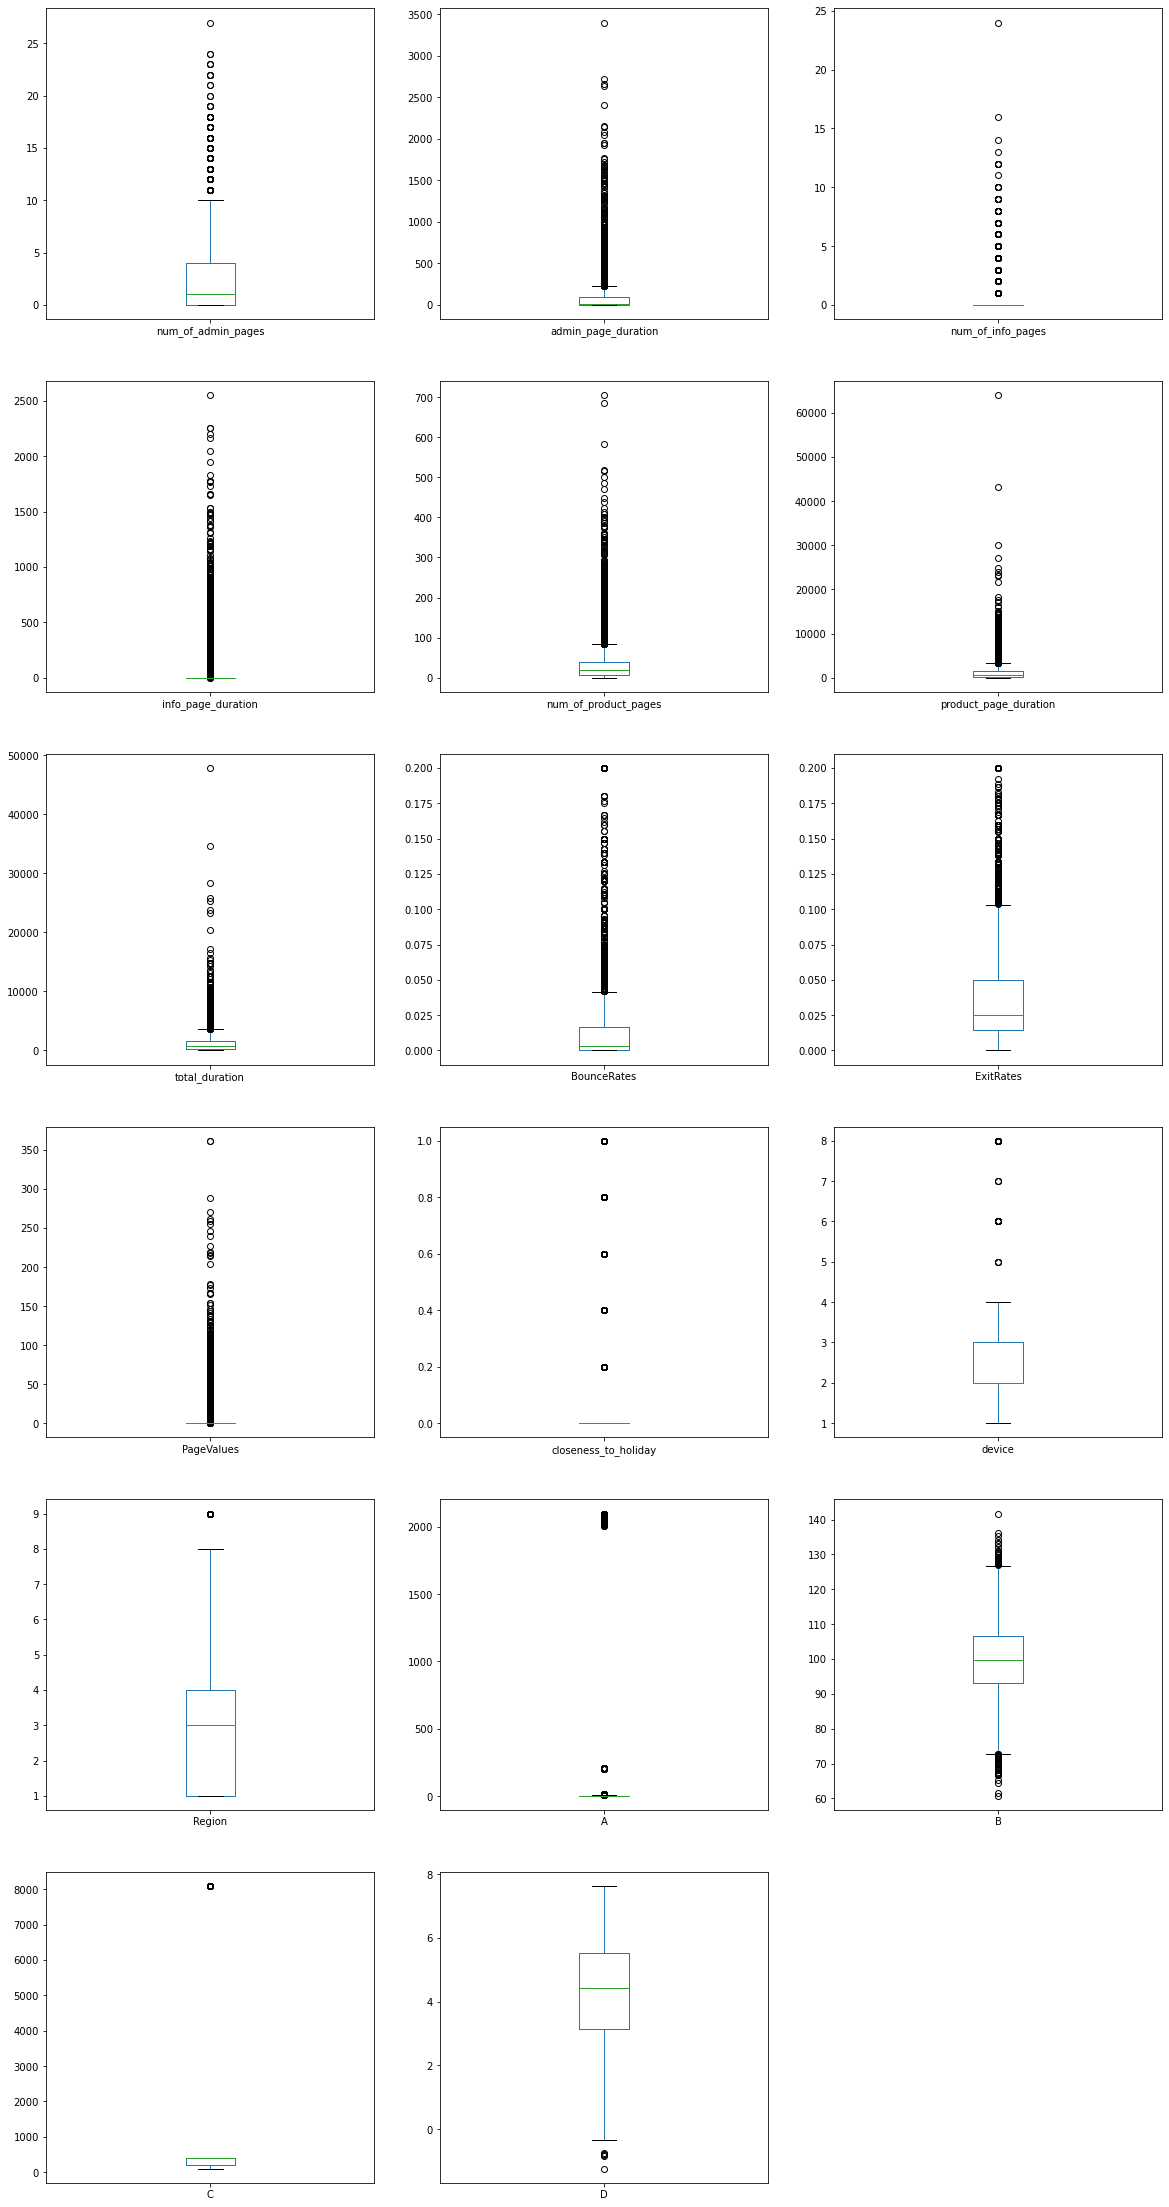

In [21]:
train_data.plot(kind="box",subplots=True,layout=(6,3),figsize=(20,40));


<br>
As we can see in the plot above there are a lot of exceptional values ​​in features related to page and duration since their average tends to be zero. <br>
Also, 'ExitRates', 'BounceRates', and 'B' have many exceptional values, feature 'B' exceptional values will be identified as outliers.
We cannot rely on the boxplot to identify the categorical features' outliers. 
<br><br>
<br>



**Now,**  to understand the distribution of the averages and the outliers values ​​according to our final goal which is to predict the label column - "purchase", we chose to split a column by "Purchase" / "not purchase" to see if there is a difference between the groups.

In [22]:

# function that create box plot considering with the purchase
def create_boxplot_graph(df):
    for col in df.select_dtypes(include=[float,int]):
        plt.figure(figsize = (8,6))
        if col != 'purchase':
            sns.boxplot(x= 'purchase', y=col , data=df, palette ='plasma')
            plt.title(col.capitalize())
            plt.suptitle('')
            plt.show()


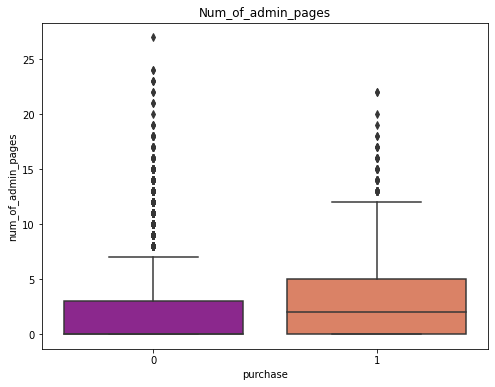

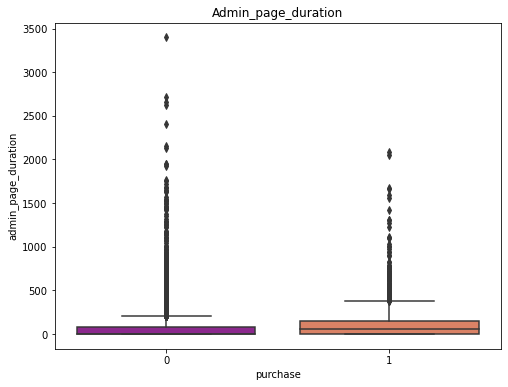

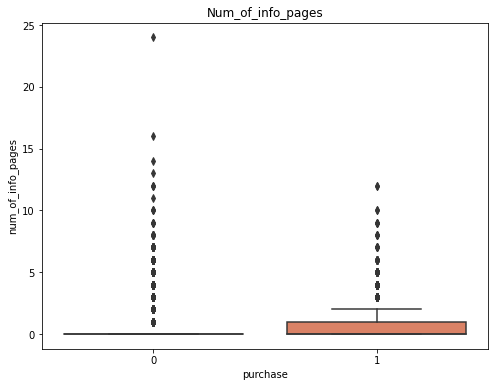

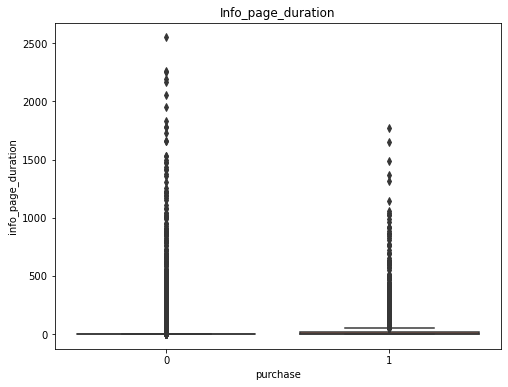

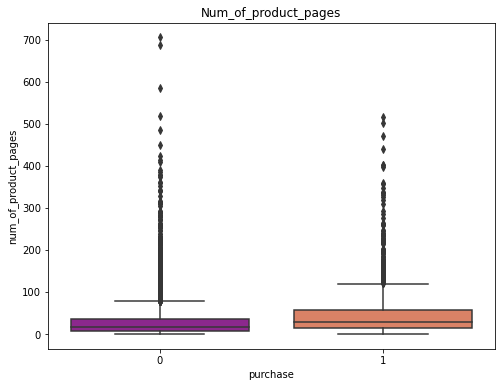

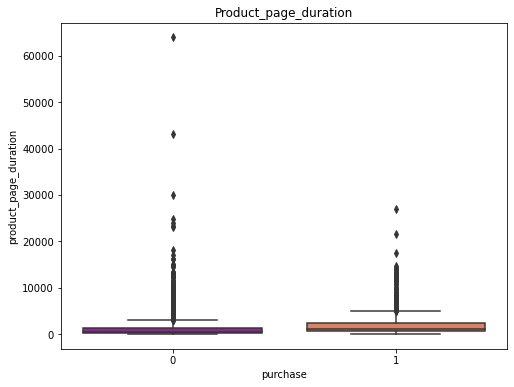

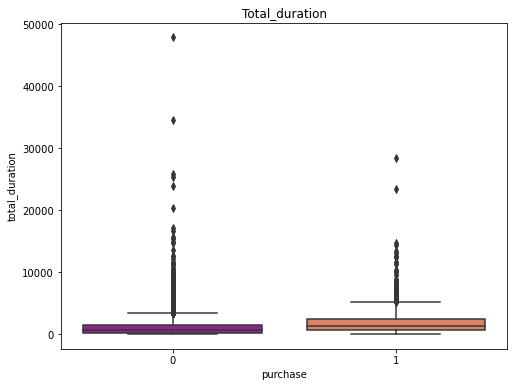

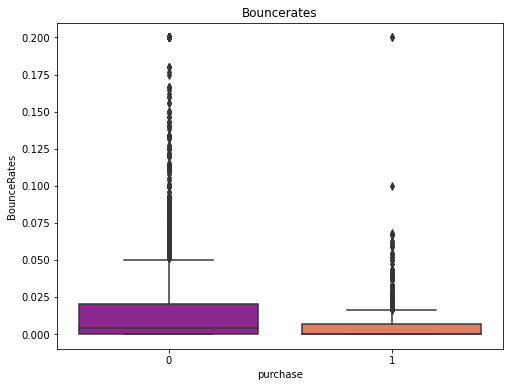

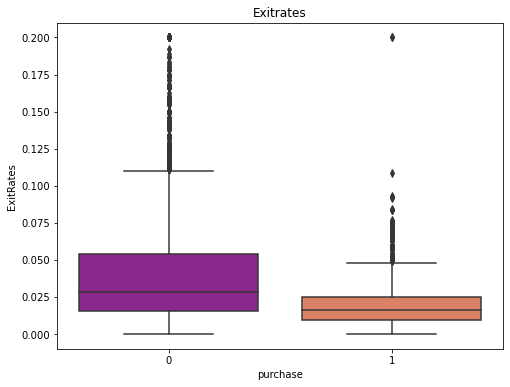

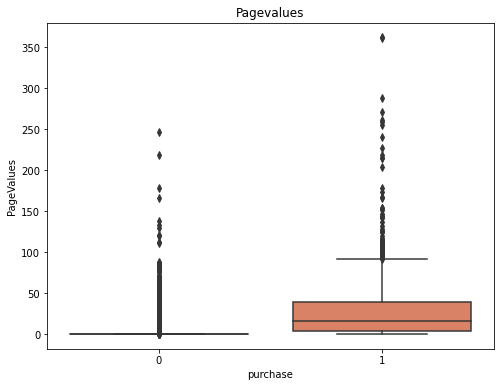

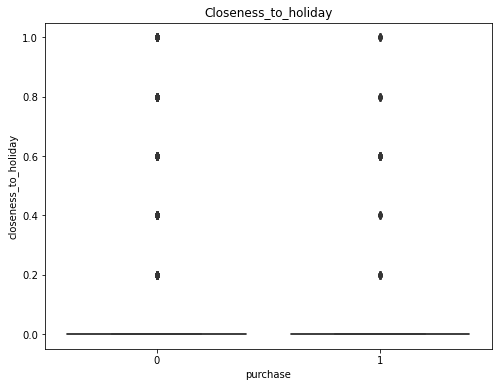

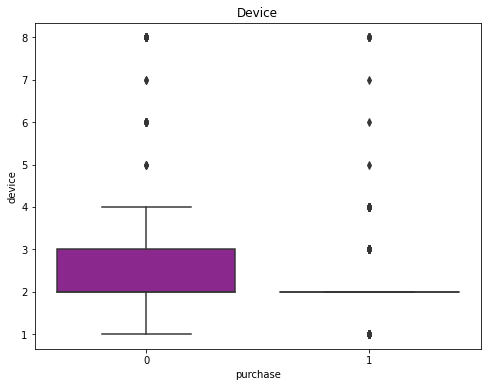

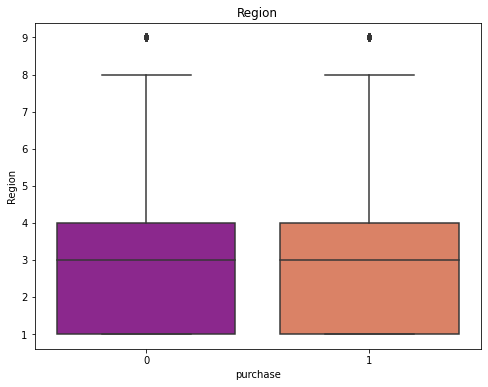

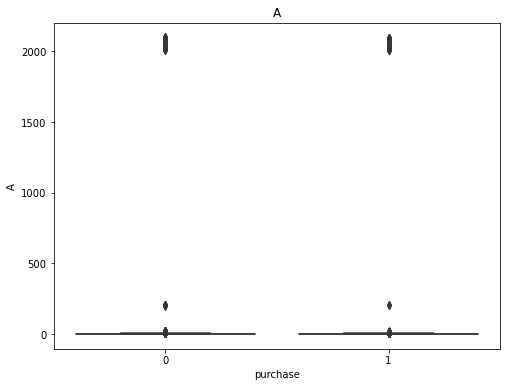

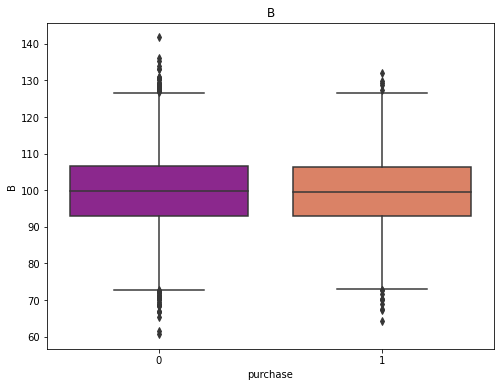

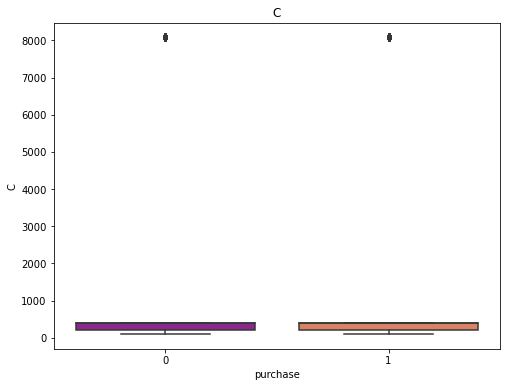

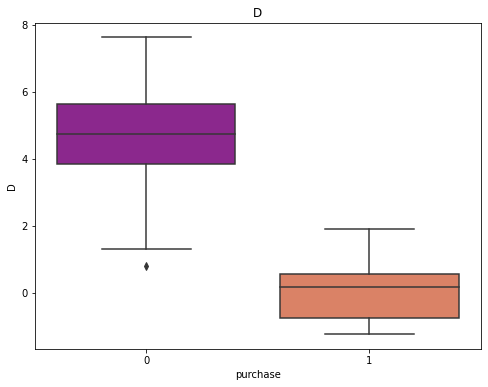

In [23]:
create_boxplot_graph(pd.concat([train_data,labels],axis=1))

<br>
For most of the features related to page and duration, the mean of the 'Purchase' is higher than 'Not Purchase'.<br> 
That makes sense because a higher mean indicates more engagement in the buying process and enhances the chance of purchasing.<br><br>
Regarding the 'ExitRates' and 'BounceRates' features, we can see that 'Not Purchase' has a higher mean than the 'Purchase' one. <br><br>
Logically, higher 'ExitRates' and 'BounceRates' mean more chance to exit from the website page and end the session without purchasing.<br><br>
feature 'D', even though is an anonymous feature we can see there is a differentiation between the two groups.
<br><br>

## Visualize Correlations

People have more free time during the weekends so we assume that the number of purchases will be larger by proportion. <br>
Let's check it via pie charts of the 'Weekend' feature, we will expect the division during the week to be less than<br> its share (5/7) and on the weekend more than its share (2/7).<br><br>

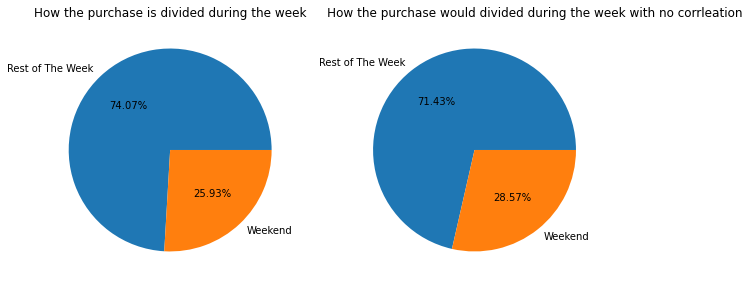

In [24]:
# Let's create a graph that show us how many purchases were during in the weekend
# In this function we check how the purchase were evenly ditributed against how it distributed in our data to check if there is some correlation
train_with_labels = pd.concat([train_data,labels],axis = 1)
week_cor_df = train_with_labels[['Weekend','purchase']]
# removing all the missing values
week_cor_df = week_cor_df.dropna()
# Plotting the bar
count_p_T, count_p_F = 0,0
for row in week_cor_df.iterrows():
    if row[1][0] == True:
        count_p_T+= row[1][1]
    else:
        count_p_F += row[1][1]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))
ax1.pie(np.array([count_p_F ,count_p_T]),labels=['Rest of The Week','Weekend'], autopct='%.2f%%') 
ax1.set_title("How the purchase is divided during the week")
ax2.pie(np.array([5/7,2/7]),labels=['Rest of The Week','Weekend'], autopct='%.2f%%')
ax2.set_title("                               How the purchase would divided during the week with no corrleation")
plt.show()




The left plot is the representation of the real distribution of the purchase according to the feature 'Weekend', and the right represents the linear distribution that we compare our results.<br>
We expect that the share of the orange part in the left plot will be larger than the right one.<br><br>
As we can see our assumption was wrong, not only the orange share in the left plot isn't bigger it's actually smaller than the right one.<br>

<br>

## Now we would like to check the relations between several features-<br>

In [25]:
# This funcation will able us to see correlation between 3 features
def plot_3D_features(df, columns):
    dataframe = df.copy()
    dataframe_col = dataframe[columns]
    # Dropping the nan values
    dataframe_col.dropna(axis=1,inplace=True)

    fig = plt.figure(figsize = (15,12))
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
     # Creating color map
    my_cmap = plt.get_cmap('hsv')
    # plotting
    sctt = ax.scatter(df[columns[0]], df[columns[1]], df[columns[2]],alpha = 0.8, c = df[columns[2]],\
                      cmap = my_cmap,  marker ='^')
    plt.title(columns[0]+', '+ columns[1]+' and '+ columns[2]+ " 3D scatter plot")
    ax.set_xlabel(columns[0]+' for X-axis', fontweight ='bold')
    ax.set_ylabel(columns[1]+' for Y-axis', fontweight ='bold')
    ax.set_zlabel(columns[2]+' for Z-axis', fontweight ='bold')
    fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
    if columns == ['PageValues','BounceRates','ExitRates'] or  columns ==  ['purchase','Month','closeness_to_holiday']:
        ax.view_init(30, 40)
    plt.show()

**We assume that the following groups of features can be related because of their meanings:**
<br><br>


**Group 1**: 'ExitRates', 'BounceRates' and 'purchase' as we saw earlier 'ExitRates' and  'BounceRates' distribute similarly and their meaning is similar too. 
We will check if the purchase status depends on the combination of the two.
<br>

***Group 2**: 'ExitRates', 'BounceRates' and 'Pagevalues' <br>
we assume that 'PageValues' can be correlate to the 'ExitRates' and  'BounceRates' because theses featrues related to the purchase process of each session.
<br>

**Group 3**: 'purchase', 'Month' and 'closeness_to_holiday' <br>
There are some months with big holiday periods like November, and December with holidays like Thanksgiving and Christmas. 
We assume that the closer to the holiday is the more purchases will occur.
<br>

**Group 4**:  'total_duration','num_of_product_pages','product_page_duration' <br>
as we saw earlier the 'product_page_duration' featuer takes a big share in the components of 'total_duration' feature.
There is connection between the 'num_of_product_pages' and 'product_page_duration' therefor we know there are a lot of miising values in the 'total_duration' feature.
Perhaps finding some correlation will help us fill the missing values using the relation.

<br><br>

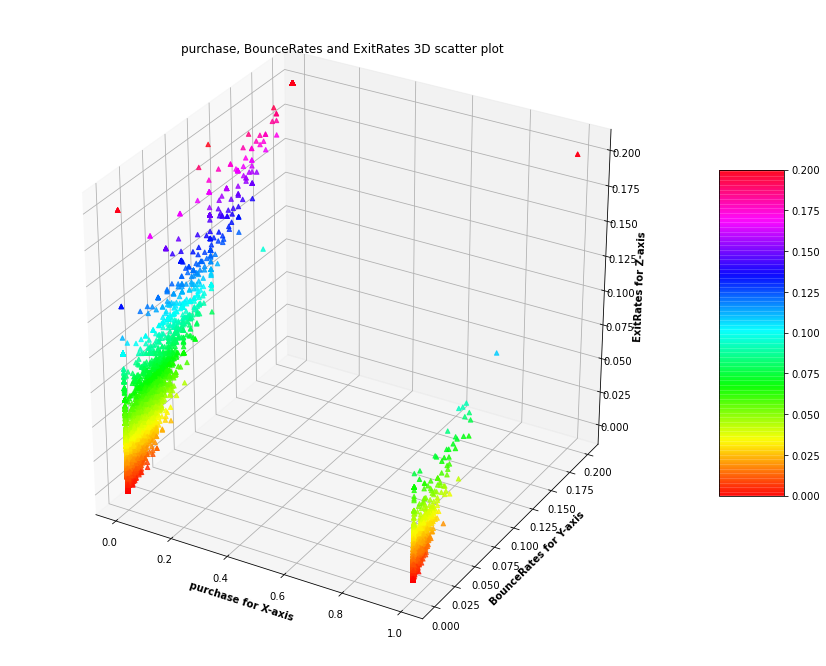

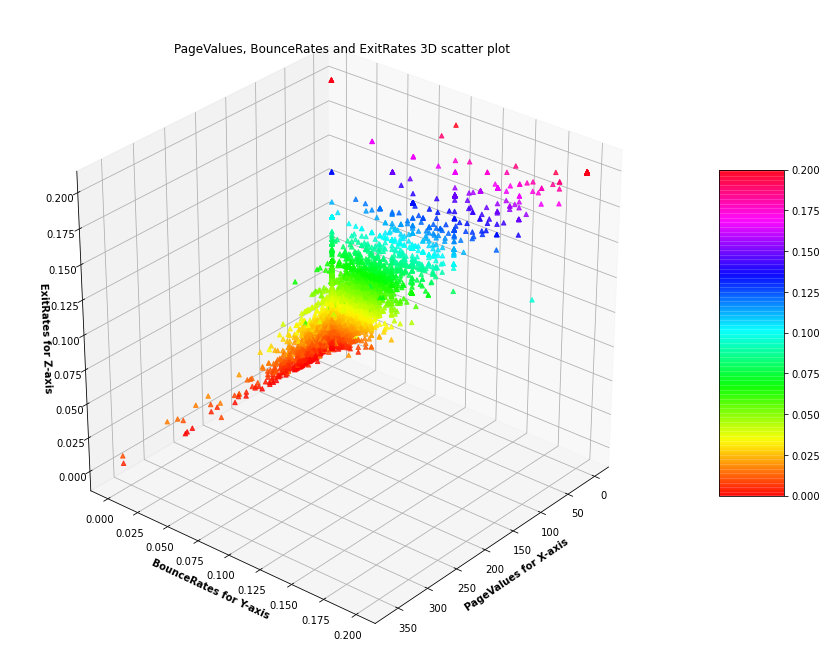

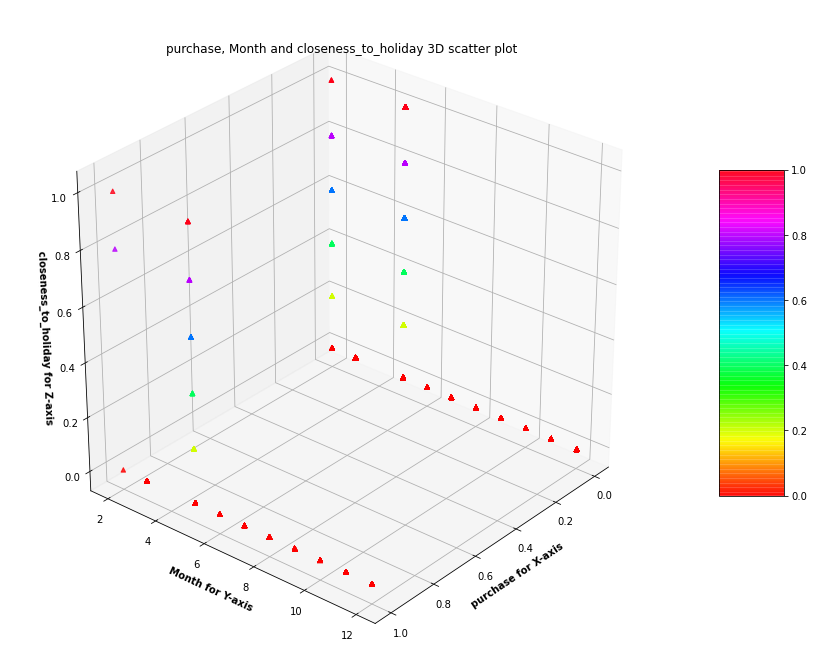

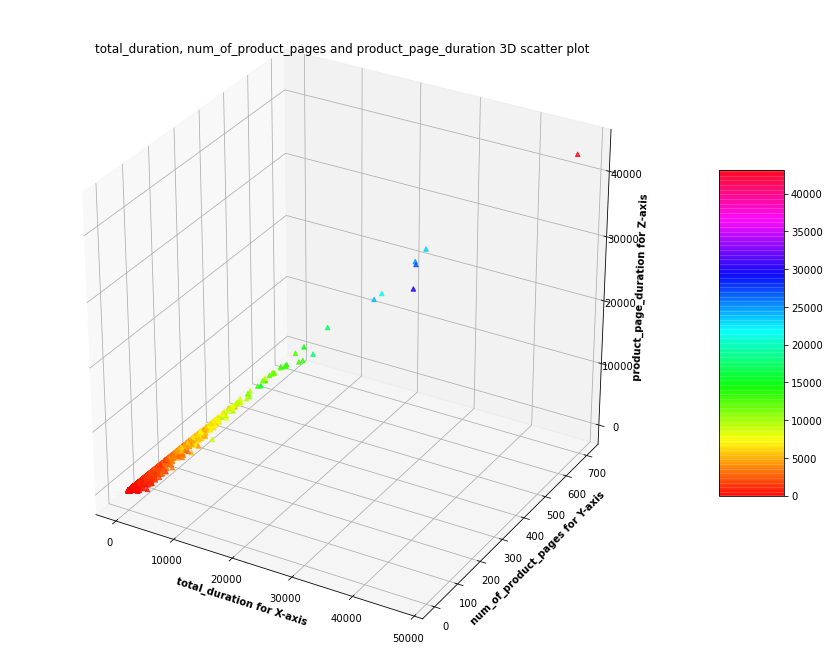

In [26]:
plot_train_data_with_labels = pd.concat([train_data,labels],axis=1)

# Factorize the catagory features:
col_cat = ['Weekend']
for col in col_cat:
    plot_train_data_with_labels[col] = pd.factorize(plot_train_data_with_labels[col],na_sentinel=-1)[0]
    plot_train_data_with_labels[col==-1] = np.nan
cleanup_nums = {"Month": {'Feb': 2,'Mar': 3, 'May': 5, 'June':6, 'Jul' : 7, 'Aug' : 8, 'Sep' : 9, 'Oct' : 10, 'Nov' : 11, \
         'Dec' :12}}
plot_train_data_with_labels = plot_train_data_with_labels.replace(cleanup_nums)


columns = [['purchase','BounceRates','ExitRates'], ['PageValues','BounceRates','ExitRates'],\
           ['purchase','Month','closeness_to_holiday'],\
           ['total_duration','num_of_product_pages','product_page_duration' ] ]
for i in range(len(columns)):
    # Taking the columns we want
    plot_3D_features(plot_train_data_with_labels, columns[i])

**Plot 1**: We can see that most sessions that end with a purchase have a small exit rate and bounce rate as we assume before. <br>
<br>
**Plot 2**: We can see that most of the sessions with large page values have small exit rates and bounce rates. That makes sense because sessions with higher page value have more chance of ending with
purchase as well as sessions with lower bounce rate and exit rate as we see in Plot 1.  <br><br>
**Plot 3**: We can see there are only two months that the 'closeness_to_holiday' feature has a value above zero (Feb and May) in Feb there is valentine's day we didn't find any reasonable explanation 
for a major holiday in May. We couldn't draw any major conclusion from this plot. <br><br>
**Plot 4**: We can see that there is a strong relationship between the 3 features, most of the values are founded around 0 as we have seen for each individual feature.


<br><br>

## Further examination of our categorical values

Let's see how our categorical features behave, we cannot let the features stay as they are for our prediction models.
In handling categorical features, we can choose to represent the categories numerically, in this case, their value is meaningless so we have to figure out how to deal with that issue.


In [27]:
catogorical_lst = ['Month','device','internet_browser', 'Region','A']

We want to differentiate between each category for the category representation to have meaning.
We will explore differentiation between each category by label and try to see if we can use this later on.

In [28]:
# Lets built the function
def create_bar_plot(lst_of_df,lst_of_col):
    unite_df = pd.concat(lst_of_df,axis = 1)
    unite_df = unite_df[lst_of_col]
    unite_df = unite_df.dropna()
    index = 0
    # Create dictionary to store the data
    while index < len(lst_of_col) -1 :
        dict_pur = {}
        dict_ses = {}
        for row in unite_df.iterrows():
            dict_pur[row[1][index]] = dict_pur.get(row[1][index],0) + row[1][-1]
            dict_ses[row[1][index]] = dict_ses.get(row[1][index],0) + 1
        dict_not_pur = dict_ses.copy()
        for key in dict_not_pur.keys():
            dict_not_pur[key] = dict_not_pur.get(key,0) - dict_pur.get(key,0)
        # create lst of the graph labels
        labels = []
        sor_1 = sorted(dict_ses.items(), key = lambda kv: kv[1],reverse=True)
        for iter in sor_1:
            labels.append(iter[0])
        # Creating the list of the value from the dictionary
        upper_lst = [dict_pur.get(key,0) for key in labels]
        down_lst = [dict_not_pur.get(key,0) for key in labels]
        # Creating the graph metrics
        x1 = np.arange(len(labels))
        x2 = np.arange(len(labels))
        width = 0.8
        # Creating the graph
        fig, ax = plt.subplots()
        p1=ax.bar(x1,down_lst, width,color = 'y')
        p2=ax.bar(x2,upper_lst, width,bottom=down_lst, color='g')
        
        # Creating the precnage
        per_lst_1, per_lst_2 = [], []
        per_1, per_2 = 0, 0
        for lab in labels:
            if dict_ses[lab] != 0:
                per_2 = (dict_pur[lab]/dict_ses[lab])
                per_1 =(1- per_2)*100
                per_2 = per_2*100
                per_lst_1.append(str(format(per_1,'.1f'))+ '%')
                per_lst_2.append(str(format(per_2,'.1f'))+ '%')
            else:
                per_2=0
                per_1= 100
                per_lst_1.append(str(format(per_1,'.1f'))+ '%')
                per_lst_2.append(str(format(per_2,'.1f'))+ '%')
        avg = str(format(sum(dict_pur.values())/sum(dict_ses.values())*100,'.1f') + '%')
        y_pos = max(dict_ses.values())/1.5
        x_pos = max(x1)/4
        # Adding some text and ploting
        ax.set_ylabel('Number of Sessions')
        ax.set_xlabel(lst_of_col[index])
        plt.xticks(x1, labels)
        ax.set_title('Order by ' + lst_of_col[index])
        ax.legend(labels=['Sessions that does not ending with Purchase','Sessions that endind with Purchase'],loc = 1,borderpad = 0.2)
        ax.bar_label(p1,per_lst_1, label_type='center',fontsize=8,color='black',weight = 'bold')
        ax.bar_label(p2,per_lst_2,fontsize=8,color='black',weight = 'bold')
        plt.text(x_pos,y_pos,'The Average Purchase Per Session Rate Is: ' +avg,fontsize=8,color='r',weight = 'bold')
        plt.rcParams["figure.figsize"] = (15,8)
        plt.show()
        index = index +1


The following visualizations show the precent of purchase and not purchase for each category.

In [29]:
create_bar_plot([train_data,labels],catogorical_lst+['purchase'])

We can see that some of the categories have different purchase rates. We can use this fact to normalize the categorical feature by assigning the category with the highest rate the value '1'
and the other categories will be assigned the purchase rate of the category divided by the highest one. We will handle this later in the pre-processing stage.

<br>

## Visualize the missing values-
<br>
Regarding the missing values, after understanding what the data looks like without reference to the missing values,<br> we would like to understand how we proceed from here with the missing values. <br>
On the one hand, we want to preserve as many rows of data as possible, and on the other hand, we want to maintain as little bias and "over-fitting" as possible. <br>
To do so we examined how many missing values ​​exist in each feature.

In [30]:
train_data.isna().sum()

num_of_admin_pages         605
admin_page_duration        413
num_of_info_pages          687
info_page_duration         317
num_of_product_pages       403
product_page_duration      621
total_duration            4753
BounceRates                 22
ExitRates                   26
PageValues                  27
closeness_to_holiday       496
Month                       25
device                     323
internet_browser           563
Region                      19
user_type                   23
Weekend                     23
A                          706
B                           23
C                           23
D                        10374
dtype: int64

We have seen that there are columns with thousands of missing values ​​and some with individual hundreds. But it does not tell us anything without knowing the relationship between the missing and the total information.

**Now for the visualization** - <br>
We have created a graph showing the percentage of missing values ​​for each feature out of all the values ​​in that feature.


<Figure size 432x288 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

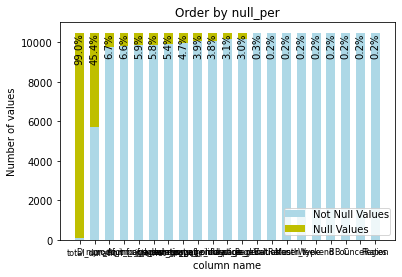

In [31]:
# checking the precentage of the null values from the whole values of each column.
# Lets build the function
def create_NA_bar_plot(df ):
    
    dict_null_per = {}
    dict_null = {}
    dict_not_null = {}
    per_lst_1, per_lst_2 = [], []
    
    df = df.copy()
    
    null_count = df.isnull().sum()
    count = df.count()

    i = 0
    for x, y in zip(null_count, count): 
        
        dict_null_per[df.columns[i]] = x/(y+x)*100
        per_lst_1.append( str(format(x/(y+x)*100,'.1f'))+ '%')
        per_lst_2.append( str(format(y/(y+x)*100,'.1f'))+ '%')
        
        dict_not_null[df.columns[i]] = y
        
        dict_null[df.columns[i]] = x
        i +=1

   
    # create lst of the graph labels
    labels = []
    
    
    null_per= sorted(dict_null_per.items(), key = lambda kv: kv[1],reverse=True )
    for iter in null_per:
        labels.append(iter[0])
        
    # Creating the list of the value from the dictionary
    
    upper_lst = [dict_null.get(key) for key in labels]
    down_lst = [dict_not_null.get(key) for key in labels]
    
    plt.subplots_adjust(bottom = 0.4, top=0.99)
    plt.figure(figsize = (40, 20))

    fig, ax = plt.subplots()
    # Creating the graph metrics
    x1 = np.arange(len(labels))
    x2 = np.arange(len(labels))
    width = 0.6
    
    # Creating the graph
    # Creating the precnage
    p1=ax.bar(x1,down_lst, width,color = 'lightblue')
    p2=ax.bar(x2,upper_lst, width,bottom=down_lst, color='y')
    # Creating the precnage
    ax.set_ylabel('Number of values')
    ax.set_xlabel("column name")
    #ax.xticks(x1, labels)
    # Custom the subplot layout
    
    ax.set_title('Order by ' + "null_per")
    ax.legend(labels=['Not Null Values','Null Values'],loc ="lower right",borderpad = 0.1)
    #ax.bar_label(p1)
    #ax.bar_label(p2)
    #ax.bar_label(p2) 
    rects = ax.patches

    # Make some labels.
    
    lab = labels
    labels = [f"{str(format(dict_null_per[key],'.1f'))+ '%'}" for key in labels]
    for rect, label in zip(rects, labels):
        height = (count + null_count)[0]
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 8, label, ha="center", va="top", rotation=90, fontsize=10
        )
    plt.rcParams["figure.figsize"] = (80,6.5)
    plt.xticks(x1, lab,fontsize = 8)    
    plt.show()
create_NA_bar_plot(train_data)

In light of the considerations noted above, we decided that over 4%, we have to address the missing values with much care.<br>
Features 'D' and 'total_duration'  are unusual and prominent due to their particularly high percentage of missing values (Over 99% and 45%). <br>We will discuss later leaving it as part of the features.
<br><br><br>
***Let's check the correlation in the data,*** maybe we can use it to fill missing values. <br>
To understand what the relationship between the features looks like and avoid "multicolinearity", we examined correlative behavior between the features. 
Using a correlation matrix that includes all the columns including the label column.


In [32]:
def correlation_mat(df_name, labels):    
    df = pd.concat([df_name,labels],axis=1)
    corrMatrix = df.corr()
    plt.figure(figsize = (16,10))
    sns.heatmap(corrMatrix, annot=True)
    plt.show()

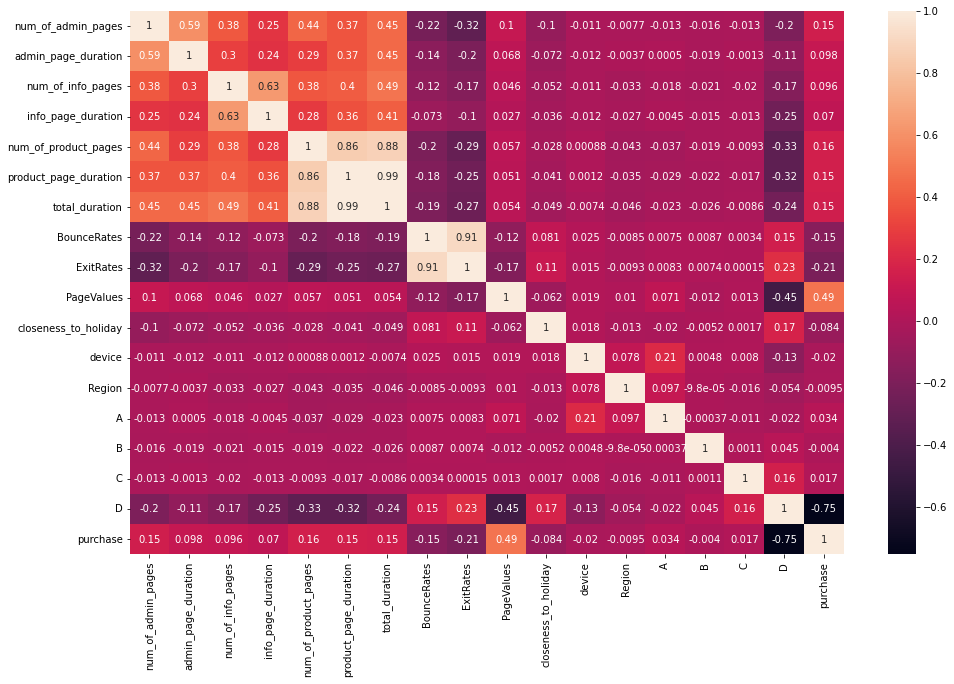

In [33]:
correlation_mat(train_data, labels)


***We can see that there is a strong correlation between the following features:*** <br>
* 'ExitRates' and 'BounceRates'<br>
* 'num_of_product_pages' and 'product_page_duration'<br>
* and the most powerful one is between the 'total_durtaion and the 'product_page_duration' -  that can fix our problem with the missing values in the 'total_duration' feature.<br>
<br>
We will use each couple of features and the correlation between them to fill the missing value one of each feature.<br>
Using a linear equation between the two features we can calculate the missing value given one value. <br>
We create a linear regression model between each couple of features, using the linear equation from the model we can calculate the missing value given one value.<br>
<br>We do this only to features with above 0.85 Pierson coef, a higher Pierson coef indicates linear relation.


On the one hand, a high correlation can help us later in the pre-processing, but on the other hand, as we have noted we want to avoid "multicolinearity" and it has been observed that actions using the correlation will only strengthen the relationship between the two variables. We will discuss this later while actually checking if there is room for the two features or if we have to remove one of them.
<br><br><br>


### Correlation with the label
We continued to look for a correlation between the different features and the different Labels they should get.


In [34]:

labels_v1 = labels.squeeze()
label_corrs = train_data.corrwith(labels_v1)
label_corrs = pd.DataFrame(label_corrs, columns = ['purchase']) 
label_corrs = label_corrs.sort_values('purchase', ascending = False) 
label_corrs.style.background_gradient(cmap = 'GnBu_r')



,purchase
PageValues,0.486404
num_of_product_pages,0.157167
product_page_duration,0.152133
total_duration,0.145429
num_of_admin_pages,0.145048
admin_page_duration,0.097504
num_of_info_pages,0.095563
info_page_duration,0.070309
A,0.034379
C,0.016940



Features with a high correlation with the label are features that can do well with the model - <br>a particularly prominent was column D which, as we noted, has a very high rate of missing values (over 99%).<br><br>
***Here we encountered a dilemma*** - <br>whether to leave column D, an anonymous feature, while filling in 99% of missing values ​​or to remove the column while losing the advantage of the correlative ratio with the label. 
<br>We will discusses it later on.


### Let's visualize the correlated features-

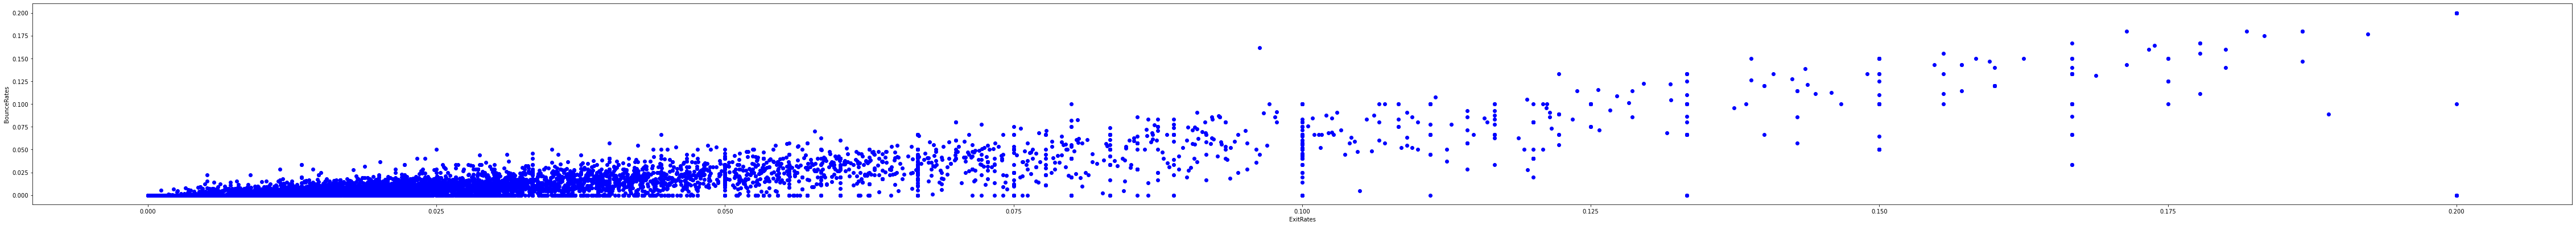

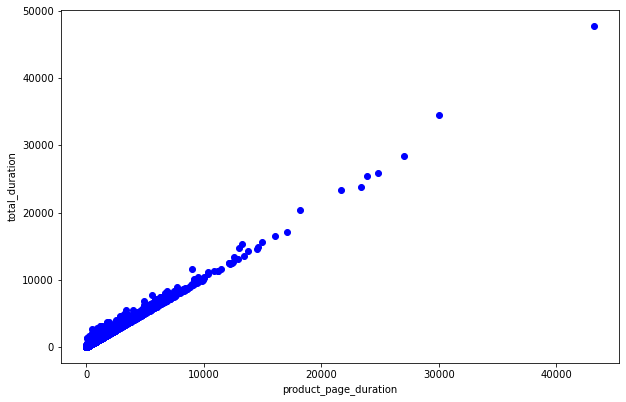

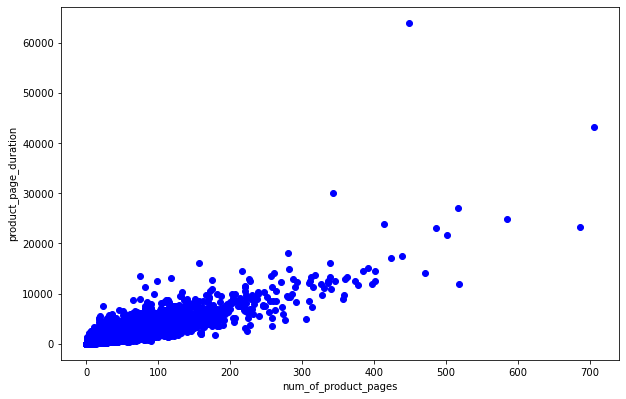

In [35]:
# Let's see some the linear link between the features
cor_lst = [['ExitRates','BounceRates'],['product_page_duration','total_duration'],['num_of_product_pages','product_page_duration']]
for col in cor_lst:
    ax=plt.axes()
    ax.scatter(train_data[col[0]],train_data[col[1]],color='blue')
    ax.set_xlabel(col[0])
    ax.set_ylabel(col[1])
    ax.axis('tight')
    plt.rcParams["figure.figsize"] = (10,6.5)
    plt.show()



Features with a high correlation with the label are features that can do well with the model - a particularly prominent was column D which, as we noted, has a very high rate of missing values (over 99%).
Here we encountered a dilemma - whether to leave column D, an anonymous feature while filling in 99% of missing values ​​, or to remove the column while losing the advantage of the correlative ratio with the label. We will discuss it later on.

As we can see there is an approximately good link between the couples of features and we can use the correlation for filling the missing values instead using random values.<br>
But before we will do that we will split the data because we change it so let's jump to the ***pre-processing!***
<br><br><br>

[Get back to the top ](#top1)

# Part 2: Pre Processing <a class="anchor" id="Part2"></a>

<br>
Based on the information we gathered from the data examination above, we will continue to process the data accordingly.

In [36]:
train, X_test, train_labels,y_test = train_test_split(train_data, labels, test_size=0.25,random_state = 41,shuffle = True)

<br>

## Removing outliers
<br>
Assuming that some of the features are normally distributed, we removed their outliers values ​​based on the IQR method — the BOXPLOT's method for detecting outliers. <br><br>
In the rest of the features, we decided not to deal with the exceptional values ​​for two reasons -<br>

* *First:* because they are not normally distributed it is difficult to distinguish the exceptional values.
* *Second:* because we did not want to lose the added value of the exceptional values.
<br><br>We could have converted the distributions of the page and duration features into normal ones but for the reasons above we decided not to do so.



In [37]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD

def iqr_outlier(x):
    """
    This function is for identifing outliers
    It returns the values from which we define who is an outlier
    """
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1

    min_ = q1 - 1.5 * iqr
    max_ = q3 + 1.5 * iqr
    result_ = pd.Series([0] * len(x))
                
    return min_, max_
    

In [38]:
# treating outliers- column 'B'

# aid function

def replace_to_val( array, max_, min_, replace_max, replace_min):
    """
    Replacing array's values bigger than a given val- max_ or samller than the val, into
    the replace_maxqreplace_min correspondigly.
    It returns the array
    
    """
    for i in range(len(array)):
        if array[i] > max_ :
            array[i] = replace_max
        
        if array[i] < min_ :    
            array[i] = replace_min 
            
    return array
        
def change_columns_outliers( df, colNames_lst ):
    
    """
    Change outliers in data to a spcific changed array
    Detecting the outliers by the 'iqr' method
    replacing the outliers into the columns edge value by iqr
    
    Returns the changed data, a list of the maximun values in each column
    and a list of the minimum values in each column 
    
    """
    data_frame = df.copy()
    
    # we want to change the outliers to the box-PLOT edges 
    # a list of the max and min values to identify outliers
    lst_max_val = []
    lst_min_val = []
    
    for colname in colNames_lst:
        
        # creating a copied array from a given column
        array_name =  np.array([ i for i in data_frame[colname] ])

        
        min_, max_ = iqr_outlier( data_frame[colname] )


        # the edges of the outliers
        replace_max, replace_min = max_, min_
            
        
        lst_max_val.append( replace_max )
        lst_min_val.append( replace_min )
                
        # replacing the outliers to the max value
        
        array_name = replace_to_val(array_name, max_, min_, replace_max, replace_min )
    
        
        data_frame.drop(colname, inplace=True, axis=1) # dropping the not changed column


        data_frame[colname] = array_name # adding the changed column

    
    
    return data_frame, lst_max_val, lst_min_val


In [39]:
# replacing 'B''s outliers using 'iqr' with the edeges of boxplot

train_pre_proc, lst_max_val, lst_min_val = change_columns_outliers(train, ['B'])

## Filling the missing values-
Regarding the missing values, we treated the features differently:


***1. Filling the missing values with correlation*** -<br>
with the help of the linear equation between the couples of features we can calculate the given value given by one value, as we have mentioned above.<br><br>


In [40]:
cor_lst = [['ExitRates','BounceRates'],['product_page_duration','total_duration'],['num_of_product_pages','product_page_duration']]

In [41]:
def create_reg(df,col_lst):
    """
    This function gets a dataframe and a list of two columns and finds the reggresion coeff and intercept for 
    each of them.
    It returns a list of the coeff and intercept
    
    """
    df_copy = df.copy()
    reg = LinearRegression()
    reg_lst = []
    for lst in col_lst:
        new_df = df_copy[lst]
        new_df.dropna(inplace=True)
        X = np.array(new_df[lst[0]]).reshape(-1,1)
        y = np.array(new_df[lst[1]]).reshape(-1,1)
        reg.fit(X,y)
        reg_lst.append([reg.coef_.item(),reg.intercept_.item()])
        
    
    return reg_lst




In [42]:
def change_by_cor(df, cor_lst, regression_matrix):
    """
    This function fills the data's missing values according to the linear reggression function's 
    output - regression_matrix.
    It also gets the data and a list of the columns divided into pairs - cor_lst. 
    It returns the new dataframe.
    
    """
    
    df_copy = df.copy()
    idx = 0
    count_lst = []
  
    for lst in cor_lst:
        c=0
        cur_x = df_copy[lst[0]]
        cur_y = df_copy[lst[1]]
        
        for i in range(len(cur_x)):
            if np.isnan(cur_x.iloc[i]) or np.isnan(cur_y.iloc[i]):
                if not np.isnan(cur_x.iloc[i]):
                    if lst[0] == 'ExitRates':
                        cur_y.iloc[i] = cur_x.iloc[i] * regression_matrix[idx][0] + regression_matrix[idx][1]
                        
                        
                        if cur_y.iloc[i] < 0:
                            cur_y.iloc[i] = 0
                    else:    
                        cur_y.iloc[i] = int(cur_x.iloc[i] * regression_matrix[idx][0] + regression_matrix[idx][1])
                        if cur_y.iloc[i] < 0:
                            cur_y.iloc[i] = 0
                if not np.isnan(cur_y.iloc[i]):
                    if lst[0] == 'ExitRates':
                        cur_x.iloc[i] = (cur_y.iloc[i] - regression_matrix[idx][1])/regression_matrix[idx][0]
                        
                        if cur_y.iloc[i] < 0:
                            cur_y.iloc[i] = 0
                        
                    else:
                        cur_x.iloc[i] = int((cur_y.iloc[i] - regression_matrix[idx][1])/regression_matrix[idx][0])
                        if cur_y.iloc[i] < 0:
                            cur_y.iloc[i] = 0
                  
        df_copy.drop(lst,axis=1,inplace=True)
        df_copy[lst[0]] = cur_x
        df_copy[lst[1]] = cur_y
        idx = idx +1
    return df_copy
                

In [43]:
# Fillng the missing values by the change_by_cor function.

regression_mat = create_reg(train_pre_proc,cor_lst)
train_pre_proc = change_by_cor(train_pre_proc,cor_lst,regression_mat)



In [44]:
# checking of how many missing we have after this process
train_pre_proc.isna().sum()


num_of_admin_pages        462
admin_page_duration       321
num_of_info_pages         491
info_page_duration        237
PageValues                 19
closeness_to_holiday      377
Month                      18
device                    240
internet_browser          421
Region                     15
user_type                  17
Weekend                    18
A                         532
C                          16
D                        7775
B                          17
ExitRates                   7
BounceRates                 7
total_duration            201
num_of_product_pages       13
product_page_duration      13
dtype: int64

<br>
We reduce the number of the missing value enormously but still we have more work to do.
<br><br>

***2. Filling missing values by the relation between the number of pages to their duration-*** <br>
We assume that there is a connection between the number of pages of each feature to its duration.<br><br>
Therefore we will fill each missing value by the next method that explains in the function below:

In [45]:
def treating_missing_val_pages_feat( df, lst ):
    
    """ 
    This function are takes all each missing value of the pages type feature and fill them by simple method
    1. Creating a dictionary that the key is the number of the pages and the value is the avarge duration for each number.
    a. if the missing value is the number of the pages we take the duration that fit this type of page and check which value is the most close one to this duration from the dictionary 
        and fill the specific key.
    b. if the missing value is the duration we do the same process but we check it according to the number of the pages.
    c. if both of the feature are missing we fill them by the median because we have few that it occur.

    """
    df_copy = df.copy()
    col_lst_copy = []
    col_lst_name = []
    index = 0
    for col_tup in lst:
        col_lst_copy.append(np.array(df_copy[col_tup[0]]))
        col_lst_copy.append(np.array(df_copy[col_tup[1]]))
        col_lst_name.append(col_tup[0])
        col_lst_name.append(col_tup[1])
        dict_values = {}
        dict_pages={}
        avg_dict = {}
        idx = 0
        median_pages = df_copy[col_tup[0]].median()
        median_duration = df_copy[col_tup[1]].median() 
        

        for num_page in col_lst_copy[index]:
            if not ( np.isnan(num_page) or np.isnan(col_lst_copy[index+1][idx]) ):
                 dict_values[num_page] = dict_values.get(num_page,0) + col_lst_copy[index+1][idx]
                 dict_pages[num_page] = dict_pages.get(num_page,0) + 1
            
            idx = idx + 1
        
        for key in dict_pages.keys():
            avg_dict[key] = avg_dict.get(key,0) + dict_values[key] / dict_pages[key]
        for i in range(len(col_lst_copy[index])):
            if np.isnan(col_lst_copy[index][i]) or np.isnan(col_lst_copy[index+1][i]):
                if not np.isnan(col_lst_copy[index][i]):
                    col_lst_copy[index+1][i] = avg_dict.get(col_lst_copy[index][i],0)
                elif not np.isnan(col_lst_copy[index+1][i]):
                    n_v_idx= np.abs(np.array(list(avg_dict.values()))-col_lst_copy[index +1][i]).argmin()
                    col_lst_copy[index][i] = list(avg_dict.keys())[n_v_idx]
                    
                else:
                    col_lst_copy[index][i] = median_pages
                    col_lst_copy[index+1][i] = median_duration

        
                    
       
        df_copy.drop([col_tup[0],col_tup[1]],axis=1,inplace=True)
        df_copy[col_tup[0]] = col_lst_copy[index]
        df_copy[col_tup[1]] = col_lst_copy[index+1]
        index = index + 2
    
    return df_copy

    


In [46]:
train_pre_proc = treating_missing_val_pages_feat(train_pre_proc,[['num_of_info_pages','info_page_duration'],['num_of_admin_pages','admin_page_duration'],['num_of_product_pages',\
'product_page_duration']])


In [47]:
train_pre_proc.isna().sum()

PageValues                 19
closeness_to_holiday      377
Month                      18
device                    240
internet_browser          421
Region                     15
user_type                  17
Weekend                    18
A                         532
C                          16
D                        7775
B                          17
ExitRates                   7
BounceRates                 7
total_duration            201
num_of_info_pages           0
info_page_duration          0
num_of_admin_pages          0
admin_page_duration         0
num_of_product_pages        0
product_page_duration       0
dtype: int64

<br>
Now we have all the duration features without missing values so we can use them to fill all the missing values of 'total_duration' by the following equation: <br><br>
'total_duration' = 'info_page_duratio'n + 'admin_page_duration' + 'product_page_duration' <br><br>
Because we do some changes in the duration feature with the function above we will create a new 'total_duration' feature that includes the sum of all the duration together.

In [48]:
def fill_total_duration_with_new_vall(df,col_lst):
    """
    This function fills the total duration column according to the sum of the three duration 
    columns(info, admin and product).
    It returns a changed copy of the data.
    
    """
    df_copy = df.copy()
    cur = df_copy[col_lst[-1]]
    for i in range(len(cur)):
            cur.iloc[i] = df_copy[col_lst[0]].iloc[i] + df_copy[col_lst[1]].iloc[i] +df_copy[col_lst[2]].iloc[i]
    df_copy.drop(col_lst[-1],axis=1,inplace=True)
    df_copy[col_lst[-1]] = cur
    return df_copy




In [49]:
train_pre_proc = fill_total_duration_with_new_vall(train_pre_proc,['info_page_duration','admin_page_duration','product_page_duration','total_duration'])


In [50]:
train_pre_proc.isna().sum()
# All right now we have no missing value in all the pages features!

PageValues                 19
closeness_to_holiday      377
Month                      18
device                    240
internet_browser          421
Region                     15
user_type                  17
Weekend                    18
A                         532
C                          16
D                        7775
B                          17
ExitRates                   7
BounceRates                 7
num_of_info_pages           0
info_page_duration          0
num_of_admin_pages          0
admin_page_duration         0
num_of_product_pages        0
product_page_duration       0
total_duration              0
dtype: int64

***3. Filling by median / common value -*** <br><br>
with the other features we wouldn't handle the missing value with made to measure methods, we will fill the missing value 
by using the median value for the numeric feature and by using the most common value for the category ones: <br>
<br>we know that the most common median/category meets the requirements for an integer as required in some features, and therefore we have broadly decided to make a median filling even where it can use the average value.


In [51]:
#treating missing values:

def treating_missing_val(data_name, col_name, remove=None, fill_val=None, fill_m=None ):
 
    """
    The function has the following options-
    1. remove - removing all the rows where there are missing values. For removing: 'r', else: none.
    2. fill_val - filling all the rows where there are missing values with a given value. fill_val 
        is the value we want to repalce with
    3. fill_m - filling all the rows where there are missing values with the column median or with it's mean.
        For fill median: 'median', fill mean: 'mean'.
    
    Pay attention - only remove works on non-numerical features!
    The function returns the change copy of the data and the changed to value

    """
    data_copy = data_name.copy()

    # removing missing values
    if (remove == 'r'):
        data_copy =data_copy.dropna(subset=[col_name])
    
    # replacing missing values 
    if ( fill_m == 'median' or fill_m == 'mean'):

        # getting the column median
        if (fill_m == 'median'):
            change_val = data_copy[col_name].median()
        
        # getting the column mean
        elif (fill_m == 'mean'):
            change_val = data_copy[col_name].mean()
        
        # setting the change val to a given value - fill_val
    else:
        change_val = fill_val

    # replacing the missing value
    data_copy[col_name] = data_copy[col_name].fillna( change_val, axis=0 )   
     
            
    return data_copy, change_val

    

In [52]:
# treating missing values in categorial columns
 
def fill_most_frequent_category( data_name, col_name, remove = None, category = None ):
    
    """
    Function to replace missing values with median value. 
    Call function to impute most occured category.
    Option instead to remove the missing values with the feature- remove = 'r'
    
    Returns a change copy of the data and the changed to value - the most frequent category
    
    """
    
    data_copy = data_name.copy()

        
    # removing missing values
    if (remove == 'r'):
        data_copy =data_copy.dropna(subset=[col_name])
    
    # Replace missing values with median value
    
    elif category != None:
    
        most_frequent_category = category
        
    else:
        
        # .mode()[0] - gives first category name
        most_frequent_category = data_copy[col_name].mode()[0]
    
    
    # replace nan values with most occured category
    data_copy[col_name].fillna( most_frequent_category, inplace=True )

    
    return data_copy, most_frequent_category


In [53]:
col_num = ['BounceRates','ExitRates','PageValues','closeness_to_holiday','A','B','C']
col_cat = ['Month','device','Region','user_type','Weekend','internet_browser']

# we built this function for the train and the validation so only for the exhbition we using here it
for col in col_num:
        train_pre_proc, none = treating_missing_val(train_pre_proc, col, fill_m='median' )
for col in col_cat:
    train_pre_proc, none = fill_most_frequent_category(train_pre_proc, col )

In [54]:
train_pre_proc.isna().sum()

PageValues                  0
closeness_to_holiday        0
Month                       0
device                      0
internet_browser            0
Region                      0
user_type                   0
Weekend                     0
A                           0
C                           0
D                        7775
B                           0
ExitRates                   0
BounceRates                 0
num_of_info_pages           0
info_page_duration          0
num_of_admin_pages          0
admin_page_duration         0
num_of_product_pages        0
product_page_duration       0
total_duration              0
dtype: int64

Only in feature 'D' missing values still remain, we haven't decided yet how to handle this feature maybe we will remove it later.<br><br><br>

### Handling the Categorical Features
Before we take any action let's remember how many categories we have from each feature

In [55]:
catogorical_lst = ['Month','device','internet_browser', 'Region','A']

In [56]:
for cat in catogorical_lst:
    print(train_pre_proc[cat].value_counts())

May     2174
Nov     1893
Mar     1208
Dec     1086
Oct      355
Jul      291
Sep      283
Aug      259
June     186
Feb      124
Name: Month, dtype: int64
2.0    4326
1.0    1604
3.0    1592
4.0     282
8.0      42
6.0       9
5.0       3
7.0       1
Name: device, dtype: int64
chrome     5223
safari     1471
browser     712
edge        453
Name: internet_browser, dtype: int64
1.0    3062
3.0    1536
4.0     758
2.0     694
6.0     524
7.0     483
9.0     328
8.0     274
5.0     200
Name: Region, dtype: int64
2.0       2833
1.0       1485
3.0       1228
4.0        648
13.0       453
          ... 
2015.0       1
2028.0       1
2066.0       1
2040.0       1
2062.0       1
Name: A, Length: 84, dtype: int64



We decided to normalize by mathematical manipulation the categorical columns in the same way as we discussed in the preliminary analysis - <br><br>according to the percentage of purchases for each category. 
Small categories may cause many problems, we don't have the same in the test, and the validation as the train may affect the normalization process.<br><br>
It also can affect the normalization by purchase because categories with a small share can be with an extremely higher or lower rate of purchase by proportion and that cause a huge bias for the normalization by purchase. <br><br>
***Here are the result for the following features:***<br>

* 'Month' - We can see we had 10 categories from this group and some of the categories have less than 1.5 percent of all the data. 
<br>
<br>
* 'device' We can see that we have a small number of devices 5,6,7 maybe we need to unite this category into one before we normalize because it can harm the normalization. 
<br>
<br>
* 'internet_browser' looks ok and ready for the normalization. 
<br>
<br>
*  'A' we had 84 categories of this feature and we don't know what it stand for - maybe we need to think to remove this feature from our model.


In [57]:
# Lets unite some feature by threshold
def treat_value_by_threshold(df,col_lst,thres_lst):
    """
    The function gets dataframe, list of columns and list of threshold.
    The function unites all the features that the proportion from all the data is below the threshold 
    to one feature and gives him the unite feature value of -1
    
    """
    idx = 0
    df_copy = df.copy() 
    for col in col_lst:
        cur = df_copy[col].copy()
        dict = {}
        for i in range(len(cur)):
            dict[cur.iloc[i]] = dict.get(cur.iloc[i],0) + 1 
        for i in range(len(cur)):
            if dict[cur.iloc[i]] / len(cur) < thres_lst[idx]:
                cur.iloc[i] = - 1
        idx = idx + 1
        df_copy.drop([col], axis = 1,inplace=True)
        df_copy[col] = cur
    
    return df_copy
            

In [58]:
train_pre_proc = treat_value_by_threshold(train_pre_proc,['device','Month','Region'],[0.05,0.05,0.05])

We noticed earlier that user_type has a really small category - 'other'.
We want to unite this category with the category that has the largest share of the feature -'Returning_Visitor' 
We can do this in this way because of the small amount from this category <br>

Also, we want to see if in the test we have a small category - 'other', to make sure the data we're changing isn't significant for the test.  


In [59]:
# seeing if in the test we have also little amount of data of the 'Other' category,
# to make sure the data were changing isn't significant for the test.  
test_data["user_type"].value_counts()


Returning_Visitor    1577
New_Visitor           259
Other                  13
Name: user_type, dtype: int64


we can see that we have also in the test little amount of the 'Other' category. <br>

#### Let's change it to the most common category-  

In [60]:

# function for replacing category to another category-
def category_replacer(df, col, category, to_replace):
    """
    This function replaces a given a category in column with another category in the same column.
    * col - the column to change the category in
    * category - the replaced category
    * to_replace - the category that will replace "category"
    Returns a changed copy of the data
    
    """
    df_copy = df.copy()

    df_copy[col].replace({category: to_replace}, inplace=True)
    
    return df_copy


In [61]:
train_pre_proc = category_replacer( train_pre_proc, 'user_type', 'Other', 'Returning_Visitor')

In [62]:
# checking the categories after the change, we can see that our function worked
train_pre_proc["user_type"].value_counts()

Returning_Visitor    6789
New_Visitor          1070
Name: user_type, dtype: int64

### Now for the normalization by purchase part:
We will do the normalization by purchase only for the 'device', 'Month', and Region' features.
For the other categorical one, we chose a different approach to handle.


In [63]:
# Lets do the normalization by the purchase precent as we describe before:
# Treating feature that inconsists
# We have features like device that we get a number that can cause inaccurate

def treat_feature_by_purchase_precent(lst_of_df,lst_of_col):
    """
    This function takes the categorial features and normalize them by the purchase precents of each category.
    For example: Device number 8 has the highest purchase precent hence it's values will be 1. All the 
    other categories' values will be the ratio between their purchase precent and the device number 8's
    purchase precent. 
    The function returns a changed copy of the data and a list of dictionaries for each category - lst_of_prior_dict.
    """
    
    df_copy = lst_of_df[0].copy()
    unite_df = pd.concat(lst_of_df,axis = 1)
    unite_df = unite_df[lst_of_col]
    idx = 0
    lst_of_prior_dict = []
    
    for col in lst_of_col:
        if idx == len(lst_of_col)-1:
            break
        col = np.array(unite_df[lst_of_col[idx]].copy())
        dict_session_counts = {}
        dict_purchase_counts = {}
        for row in unite_df.iterrows():

            dict_session_counts[row[1][idx]] = dict_session_counts.get(row[1][idx],0) + 1
            dict_purchase_counts[row[1][idx]] = dict_purchase_counts.get(row[1][idx],0) + row[1][-1]
        dict_avg_purchase ={}
        prior_value_dict = {}
        for key in dict_session_counts.keys():
            dict_avg_purchase[key] = dict_purchase_counts[key]/dict_session_counts[key]
        for i in range(len(col)):
            
            prior_value_dict[col[i]] = float(dict_avg_purchase[col[i]]/max(dict_avg_purchase.values()))
            col[i] = prior_value_dict[col[i]]
        df_copy.drop(lst_of_col[idx],axis=1,inplace=True)
        df_copy[lst_of_col[idx]] =  col
        idx = idx + 1
        lst_of_prior_dict.append(prior_value_dict)
        
        
            
        
    return df_copy, lst_of_prior_dict
    


In [64]:
train_pre_proc, dic = treat_feature_by_purchase_precent([train_pre_proc,train_labels],['device','Month','Region','purchase'])

In [65]:
# Let's see the normalization values:
for cat in ['device','Month','Region']:
    print(train_pre_proc[cat].value_counts())

0.840873    4326
0.738439    1604
0.504305    1592
1.000000     337
Name: device, dtype: int64
0.411491    2174
1.000000    1893
0.637174    1498
0.393416    1208
0.540580    1086
Name: Month, dtype: int64
0.990138    3062
0.890004    1536
1.000000     802
0.881706     758
0.936752     694
0.730482     524
0.842807     483
Name: Region, dtype: int64


In [66]:
train_pre_proc.dtypes

PageValues               float64
closeness_to_holiday     float64
internet_browser          object
user_type                 object
Weekend                     bool
A                        float64
C                        float64
D                        float64
B                        float64
ExitRates                float64
BounceRates              float64
num_of_info_pages        float64
info_page_duration       float64
num_of_admin_pages       float64
admin_page_duration      float64
num_of_product_pages     float64
product_page_duration    float64
total_duration           float64
device                   float64
Month                     object
Region                   float64
dtype: object

We can see that the 'Month' feature has still type of object and 'Weekend' feature has type of bool so let's  change them into type of numeric. 

In [67]:
train_pre_proc['Month'] = np.array(train_pre_proc['Month']).astype(float)
train_pre_proc['Weekend'] = np.array(train_pre_proc['Weekend']).astype(int)

<br><br>
## The importance of normalization<br>

We decided to normalize the rest of the data later according to the need of each model (KNN and Logistic Regression).<br>
Each model when creating the classification refers to the distance between the features.<br>
When having a different scale for each feature the model will give more weight to the larger scale one, hence, the model won't work as we expect it to.



<br>

## Create dummy variables

after we handled some of the categorical variables using the normalization method mentioned above,<br> we can now handle the 'user_type' and 'internet_browser' columns. <br><br>
Already in the previous stages, we have reduced the number of categories of 'internet_browser' and 'user_type', so we can turn <br>the columns into dummy variables and thus reduce the chance of having the curse of dimensionality.<br>


In [68]:
# Creating dummy columns from categorial columns

def create_dummies( data_frame, col_name ):
    
    """
    This function Creates dummy columns from a given column
    Returns a change copy of the data and makes sue that all the categories are there
    
    """
    data_copy = data_frame.copy()
    
    # perform one-hot encoding on col_name column 

    dummies = pd.get_dummies(data_copy[col_name])
    
    # adding the dummy columns to the copied dataframe
    data_copy = pd.concat([data_copy, dummies], axis=1 )
    
    # dropping the original column 
    data_copy = data_copy.drop([col_name], axis = 1) 

    return data_copy
    

In [69]:
train_pre_proc = create_dummies(train_pre_proc,'internet_browser')
train_pre_proc = create_dummies(train_pre_proc,'user_type')

In [70]:
train_pre_proc.shape

(7859, 25)

We started with 22 column and now we are with 25.

<br><br>
# Dimension reducation
So after we handled the data we want to ask ourselves- <br>
**Is the dimensionality of the data too large?** 
<br><br>
No, High dimensional data refers to a dataset in which the number of features p is larger than the number of observations <br> N: p >> N. Here, we have approximately 25 features for 10,000 observations. 
<br>

High-dimensionality can also be referred to as the Curse of Dimensionality describes the explosive nature of increasing data dimensions.
<br>

**Why can high-dimensional data create a problem?** <br>
* If we have more features than observations then we run the risk of massively overfitting our model — this would generally result in terrible out-of-sample performance.
	<br>
* Regarding the bias-variance trade-off, the more dimensions we have the higher variance we'll have in our model. As we saw in class, When we have too many features, observations become harder to cluster and no meaningful clusters can be formed.
<br>
* Furthermore, the explosive nature of increasing data dimensions results in an exponential increase in computational efforts that are required for its processing and/or analysis.
<br>

**How do we recognize that the dimension of the problem is high**?
<br>

In order to reduce our data's dimensionality, we can use PCA, which works based on the variance of the features. <br>
When having high dimensionality, most of the data's variance may be explained with fewer features.<br>
we can use feature selection, and remove certain features according to metrics such as correlation and the number of missing values.

<br>



### **In this step, we will use two methods and choose the one who will give us better performance -**<br>
The First Method will be **PCA**<br>
The second one will be **manual feature selecting**<br>

 ## PCA

PCA does not work on missing values and categorial non-numeric features.<br>
We already handled most of the categorical features, some of which we transformed into dummies.<br>
We'll keep it in mind since the total added value of each feature is not captured because of the splitting into dummies or transformations.<br>
We will need to do several modifications before performing the method:

In [71]:
# beacuse we havent treated column D's missing values we would like to drop it for the PCA
train_pre_proc_pca = train_pre_proc.copy()
train_pre_proc_pca.drop(['D'],inplace = True,axis = 1)


checking for the number of features before the PCA

In [72]:

train_pre_proc_pca.shape

(7859, 24)

### **Performing PCA -**<br>

We want to reduce the dimensionaly to cover 99% of the variance in the data
<br>we can do that by setting n_samples to 0.99 and whiten=True-
<br>When True, the components_ vectors are multiplied by the square root of n_samples and then
<br>divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.

In [73]:
# pca
pca = PCA( 0.99, whiten=True )
new_redueced_X = pca.fit_transform(train_pre_proc_pca)
print(f'number of components which preserve at least 99% of the variance: {new_redueced_X.shape[1]}')

number of components which preserve at least 99% of the variance: 2


As We can see, the number of features that preserves at least 99% of the variance is 2. <br>
If earlier we discussed high-dimensionality, in this case, it's the exact opposite. <br>
Having low-dimensionality can cause under-fitting and result in bad performance on the classification. We aspire to lower the bias and variance as much as we can,<br> as opposed to the bais-variance trade-off, low-dimensionality may increase bias and decrease the variance. <br>
We believe using this method, not only causes underfitting, it is incorrect and unappropriate to base on only 2 features in our model. <br>
For the following reasons, we won't base on this method in our dimension reduction.<br>


## Manual Feature Selecting
<br>
With this method, we want to select features to drop on a logical basis.
<br><br>
The first feature we want to drop is-

***column 'D' -*** <br> <br>
We discussed prior the advantages and disadvantages of keeping it.<br> We believe that its missing values issue is major and even though it has a strong correlation with the 'purchase' column, the disadvantage overcomes the advantages. <br><br>

Then we would like to drop the following the features-

***column 'A' and column 'C'-***
<br> <br>
As we have seen prior, Column 'C' contains 84 categories, and Column 'A' contains 94 categories, <br>most of the columns' categories appear only a few times. Turning each category into a Dummy feature is problematic because of the Curse of Dimensionality.<br>
We were able to gather a little information about column "C" 's values but we can't guaranty its validation.<br>
On the other hand, we want to preserve as much data as we can. On the other hand, keeping in mind these are anonymous features,<br> we cannot find a rational explanation for the adding values of those features. <br> And, perform some manipulations as we did before to other non - anonymous features. <br> <br> From all of the above, we will remove those features.<br>



***columns total_duration \ product_page_duration-*** <br><br>
As we discussed prior, we want to avoid multicollinearity.<br>
We saw earlier that the following pairs have a strong correlation- <br>'ExitRates', 'BounceRates'; 'product_page_duration', 'total_duration'; 'num_of_product_pages', 'product_page_duration'. <br>
We later used that fact to fill their missing values. We expected their correlation to enlarge.<br><br>

**In addition,*** we could drop ,from the same considerations, one of the 'ExitRates','BounceRates' columns. Because they are important in terms of their meaning, we desire to keep both. We believe that these metrics are significant and widely used in google analytics.

**Let's see the correlations again:**<br>




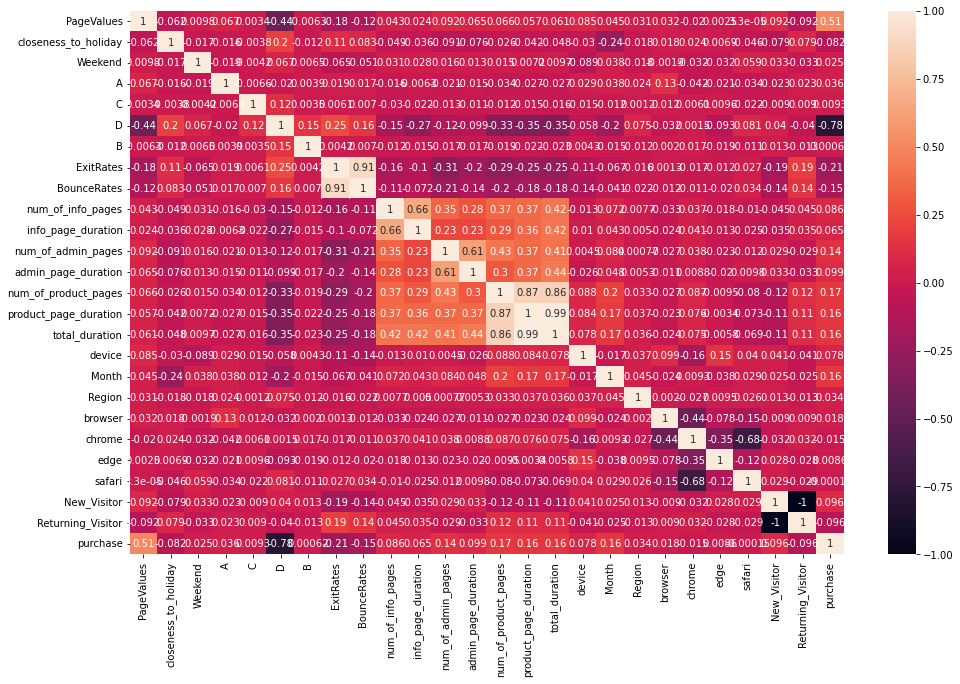

In [74]:
correlation_mat(train_pre_proc, train_labels)

In [75]:
labels_v1 = train_labels.squeeze()
label_corrs = train_pre_proc.corrwith(labels_v1)
label_corrs = pd.DataFrame(label_corrs, columns = ['purchase']) 
label_corrs = label_corrs.sort_values('purchase', ascending = False) 
label_corrs.style.background_gradient(cmap = 'GnBu_r')


,purchase
PageValues,0.505062
num_of_product_pages,0.170503
Month,0.163910
total_duration,0.163278
product_page_duration,0.160400
num_of_admin_pages,0.138895
admin_page_duration,0.098831
New_Visitor,0.096052
num_of_info_pages,0.086451
device,0.078071


Here we can see that the correlations remained unchanged. <br>The pair that has still the strongest correlation is 'product_page_duration' and 'total_duration'. <br>
**We will now discuss which column we can remove from the data out of this pair to avoid multicollinearity.** <br><br>
**On the on hand**, product_page_duration has a weaker correlation with the purchase column by a little gap. We aspire to have a stronger correlation with the label column since our target is to classify by it. This column also has larger values than the other duration columns, which gives it maybe more weight in the purchase process logically.<br>
**On the other hand**, 'total_duration' had a large set of missing values, those we filled using the other duration column including the product_page_duration.<br> Because of that, it now includes all the duration columns and particularly the product_page_duration one. <br>That gives it more comprehensive added value.<br><br>
**We tend to go with keeping the total_duration and removing the product_page_duration.**
<br>



In [76]:
train_pre_proc.drop(['D','C','A','product_page_duration'],inplace = True,axis = 1)

<br><br>
## Pre-Prossesing Functions

<br>
we want to gather all the actions we performed above into one function that can handle both train and test correspondingly.
<br><br>It will come in handy later on when dealing with all kind of train, validation and test.

### Missing Value function for the train and validation

In [77]:
# creating a function that treats the validation/test's missing values according to the missing values treatment in the train


def missing_val_train_and_test( df_train, df_test ):
    """
    the function treats the validation/test's missing values according to the missing values treatment in the train    
    change_val and most_frequent_category are dictionaries that save the filled values for each column
    
    """
    test = df_test.copy()
    train = df_train.copy()
    
    
    # train
    
    # treating missing values in a different way for the most correlative features
    # filling with regression-
    cor_lst = [['ExitRates','BounceRates'],['product_page_duration','total_duration'],['num_of_product_pages','product_page_duration']]

    regression_matrix = create_reg( train, cor_lst )
    
    train = change_by_cor( train, cor_lst, regression_matrix)

    # filling the missing value with the relation between the pages' num and their duration

    train  = treating_missing_val_pages_feat( train, [['num_of_info_pages','info_page_duration'],\
                                             ['num_of_admin_pages','admin_page_duration'], \
                                            ['num_of_product_pages','product_page_duration']])
    
    # filling with fill_total_duration_with_new_vall - for explaination refer to the function's documantaion.     
    #                             
    col_lst = ['info_page_duration','admin_page_duration','product_page_duration', 'total_duration']
    train  = fill_total_duration_with_new_vall( train, col_lst )

    # the columns divided into numeric features and categorial ones:
    col_num = ['BounceRates','ExitRates','PageValues','closeness_to_holiday','B' ]
    col_cat = ['Month','device','Region','user_type','Weekend','internet_browser']

    # dictionaries to save the filled values for each column:
    most_frequent_category = {}
    change_val = {}

    # filling the missing values for each column
    for col in col_num:
        
        train, val = treating_missing_val(train, col, fill_m = 'median' )
        change_val[col] = val

    for col in col_cat:

        train, category = fill_most_frequent_category( train, col )
        most_frequent_category[col] = category

    # Test
    
    # treating missing values in a different way for the most correlative features
    # filling with regression-

    test = change_by_cor( test, cor_lst, regression_matrix)

    # filling with treating_missig_values method- for explaination refer to the function's documantaion. 
    test  = treating_missing_val_pages_feat( test,  [['num_of_info_pages','info_page_duration'],\
                                             ['num_of_admin_pages','admin_page_duration'], \
                                            ['num_of_product_pages','product_page_duration']])
    
    # filling with fill_total_duration_with_new_vall - for explaination refer to the function's documantaion.                                  
    test  = fill_total_duration_with_new_vall( test, col_lst )

    # filling the missing values for each column    
    for col in col_num:
        test, x = treating_missing_val( test, col, fill_val = change_val[col] )
    for col in col_cat:
        test, y = fill_most_frequent_category( test, col, category = most_frequent_category[col] )
    
    
    return train, test


    

### Outliers for the validation and the test data: <br>
Hence we want to base our train in the validation and test prediction we will take the outliers' bounderis of each feature that we decided to detect in the pre processing. <br>
We will imply these outliers' bounderis and detect the outliers by them on the validation and test data.

In [78]:
def change_columns_outliers_test( data_frame, colNames_lst, lst_max_value, lst_min_value ):
    
    df = data_frame.copy()
    idx = 0 
    for col in colNames_lst:
        cur = df[col]
        for i in range(len(cur)):
            if cur.iloc[i] > lst_max_value[idx]:
                cur.iloc[i] = lst_max_value[idx]
                
            if cur.iloc[i] < lst_min_value[idx]:
                cur.iloc[i] = lst_min_value[idx] 
                
        df.drop(col,axis=1,inplace=True)
        df[col] = cur
        idx = idx +1
    return df

### Normalize the categorical features by the purchase rates from the train data <br>
We will take  the normalization values of the train data and use them in the data of the test. <br>
Hence we want to base our train in the validation and test prediction we will take the nomralize categories which we creatd before and imply them on the validation and on the test data. 

In [79]:
def Treat_Val_by_train_Purchase( dataframe, col_lst, dict_lst ):
    """
    This function takes the replaced values that we got from treat_feature_by_purchase_precent function for 
    the train data. It replaces the same values in the test via the given dictionaries of the changed train values. 
    
    """
    df = dataframe.copy()
    idx = 0
    for col in col_lst:
        cur = df[col].copy()
        for i in range(len(cur)):
            if cur.iloc[i] in dict_lst[idx].keys():
                cur.iloc[i] = dict_lst[idx][cur.iloc[i]]
            else:
                cur.iloc[i] = np.median(list(dict_lst[idx].values()))
        
        df.drop([col], axis = 1,inplace=True)
        df[col] = cur
        idx = idx +1
    return df

### Dummy Variables for the test's data: <br>
Hence we want to base our train in the validation on test prediction we will take the dummy variables which we creatd before and imply them on the validation and the test data. 

In [80]:
# treating the categorial:
def create_dummy_pre_processing( data_frame ):
    
    data_copy = data_frame.copy()
    data_copy = create_dummies( data_copy, 'user_type' )
    data_copy = create_dummies( data_copy, 'internet_browser' )

    
    return data_copy


### The Pre - Processing Funtion

In [81]:

def pre_processing( df_train, df_test, train_labels ):
    
    """
    This function performs all the pre-processing on both train and test data given to it.
    The pre-processing is according to all the actions we performed above when handled the data.
    It returns the changed copies of both train and test
    
    """
    train = df_train.copy()
    test = df_test.copy()
   
    ### outliers ###
    colNames_lst = ['B']
    train, lst_max_val, lst_min_val = change_columns_outliers(train, colNames_lst)
    test = change_columns_outliers_test( test, colNames_lst, lst_max_val, lst_min_val )
    
    
    ### missing values ### 
    train, test = missing_val_train_and_test( train, test )
    
    ### dropping the manual selected features ###
    col_lst_drop = []
    for col in ['A', 'C', 'D', "product_page_duration"]:
        if col in train.columns:
            col_lst_drop.append(col)
    train,test = train.drop( col_lst_drop, axis = 1 ), test.drop( col_lst_drop, axis = 1 )

    
    ### minimizing the number of categories ### 
    
    # making one data for train and test
    train_len, test_len = len(train), len(test)
    data_copy = pd.concat([train, test], axis = 0)

    # treating small categories -  
    data_copy = treat_value_by_threshold( data_copy, ['device','Month','Region'],[0.05,0.05,0.05] )
    data_copy = category_replacer( data_copy, 'user_type', 'Other', 'Returning_Visitor')
    
    # spliting the one data into the train and test data
    train  = data_copy.iloc[0:train_len,: ]
    test  = data_copy.iloc[ train_len: , :]


    
    ### transformations ###
    
    train, lst_of_prior_dict = treat_feature_by_purchase_precent([train,train_labels],['device','Month','Region','purchase'])
    test =  Treat_Val_by_train_Purchase( test ,['device','Month','Region'], lst_of_prior_dict ) 

    
    ### Categorial ###
    col_cat = [ 'Weekend' ]
    for col in col_cat:
        train[col] = pd.factorize(train[col])[0]
        test[col] = pd.factorize(test[col])[0]
    
    
    ### create dummies ###
    
    # need to concate the train and test then dummies and then split
    # making one data for train and test
    train_len, test_len = len(train), len(test)
    data_copy = pd.concat([train, test], axis = 0)

    # creating dummies
    data_copy= create_dummy_pre_processing( data_copy )
    # Making sure that 'Month' feature has the numeric type
    data_copy['Month'] = np.array(data_copy['Month']).astype(float)
    # spliting the one data into the train and test data
    train  = data_copy.iloc[0:train_len,: ]
    test  = data_copy.iloc[ train_len: , :]

    return train, test

In [82]:
# pre-processing the train and validation
d_train,d_test = pre_processing( train, X_test, train_labels )


In [94]:
d_train.head()

,PageValues,closeness_to_holiday,Weekend,B,ExitRates,BounceRates,num_of_info_pages,info_page_duration,num_of_admin_pages,admin_page_duration,...,total_duration,device,Month,Region,New_Visitor,Returning_Visitor,browser,chrome,edge,safari
id,,,,,,,,,,,,,,,,,,,,,
7637,0.00000,0.0,0,92.115355,0.200000,0.20000,0.0,0.0,0.0,0.0,...,0.000000,0.840873,1.000000,0.990138,0,1,0,1,0,0
1506,0.00000,0.0,0,99.514253,0.005797,0.00000,0.0,0.0,2.0,26.0,...,1878.000000,0.840873,0.393416,0.936752,0,1,0,1,0,0
7345,0.00000,0.0,0,103.885471,0.083013,0.05641,2.0,11.0,1.0,0.0,...,1810.666667,0.738439,0.540580,0.990138,0,1,0,0,0,1
7415,14.12737,0.0,1,94.424919,0.028571,0.00000,0.0,0.0,0.0,0.0,...,331.000000,0.738439,1.000000,0.881706,1,0,0,1,0,0
497,0.00000,0.0,0,97.811945,0.028571,0.00000,0.0,0.0,0.0,0.0,...,125.000000,0.840873,0.393416,0.990138,0,1,0,1,0,0


[Get back to the top ](#top2)

<br><br>
# Part 3: Modeling <a class="anchor" id="Part3"></a> 

<br>

**Now for the modeling part.** <br>
We performed the pre-processing as mentioned above with the models kept in mind.
For choosing the ideal parameters we used grid_search_cv with both optional parameters and both the default parameters.<br><br>

**Here are the models we used and why we used them:** <br><br>
* **KNN -**  For this model, we chose to standardize the data beforehand to prevent the scale of each feature from affecting the model disproportionately.<br><br> 

* **Logistic Regression -** For this model, we chose to standardize the data since we were using the l2 penalty, which is affected by the scale of the features.<br><br>

* **Random Forest -** Here, we chose not to normalize the data, since Random Forest is invariant to scale. This model performed the best out of all models both on the test and train datasets. We believe since Random Forest is capable of non-linear classification, it can effectively handle outliers by separating them away from the data, and can deal with our large dataset by generating more trees and deeper trees.<br><br>

* **Multi-Layered Perceptron -**  For this model, we chose to normalize the data to help in faster convergence and to reduce the probability of reaching a bad local minimum. We indeed found that normalizing the data before running the MLP made its performance significantly more consistent.<br><br>




<br>

***Now after pre-processing our data, we'd like to efficiently test our models,***
<br>
<br> For that we'll write several aid functions.
<br><br>
The following function will help us measure the score of each model according to the AUC method-

In [83]:

def model_testing(clf, x_train, Y_train, x_test, Y_test):
    """
    Recieves fully split and pre-processed data and models it to the chosen classifier- clf
    displays a ROC-curve and measures the score of the model according to the AUC method.
    Returns the auc on the test.
    
    """
    
    # copy and process the data
    X_train, X_test =  x_train.copy(), x_test.copy()
    y_train = Y_train.copy().astype(int)
    y_test = Y_test.copy().astype(int)
    
    
    # fitting the model to the chosen clasiffier 
    clf.fit( X_train, y_train )
       
        
    # predicting the model on the train and test
    pred_score_train = clf.predict_proba(X_train)[:, 1]
    pred_score_test = clf.predict_proba(X_test)[:, 1]
    
    
    # for the train and test, getting the false and true positive rate and the threshhold from the roc_curve
    false_positive_rate_train, true_positive_rate_train, threshold_train = roc_curve( y_train, pred_score_train )
    false_positive_rate_test, true_positive_rate_test, threshold_test = roc_curve( y_test, pred_score_test )
    
    # The auc for the train
    train_auc_t = auc( false_positive_rate_train, true_positive_rate_train )
    
    # The auc for the test
    test_auc_t = auc( false_positive_rate_test, true_positive_rate_test )
     
    print(f"The train auc is {train_auc_t}")
    print(f"The test auc is {test_auc_t}")

    
    model_name = str(clf).split('(')[0]
        
    plt.subplots(1, figsize=(9,7))
    
    plt.title(f" ROC curve for {model_name} ")
    plt.plot(false_positive_rate_test, true_positive_rate_test, label= f'ROC curve area = {test_auc_t:.4f}')
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".6"), plt.plot([1, 1] , c=".6")
    plt.ylabel(' True Positive Rate ')
    plt.xlabel(' False Positive Rate ')
    plt.legend(loc="lower right")
    plt.show()
    
    return test_auc_t

    

<br><br>
Let's standardize the data beforehand to prevent the scale of each feature from affecting the model disproportionately

In [84]:

scaler = StandardScaler()
train_normalize = scaler.fit_transform( d_train.copy() )
X_test_normalize = scaler.fit_transform( d_test.copy() ) 


### Now for our models-
<br>

#  K-Nearest-Neighbors


Using grid search for finding the ideal parameters-
<br>
Define paramaters to search over and their values.  
**The default parameters -** <br>(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2,
metric='minkowski', metric_params=None, n_jobs=None)

***explanation:***
We chose our parameters by the combination of grid search of the parameters : 'algorithm','n_neighbors' and 'weights', the others parameters we set as the default from the function documentation. 


In [85]:
knn_parameters = {'n_neighbors': [num for num in range(20,70,10)], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']\
                 ,'weights': [ 'uniform', 'distance' ],'leaf_size':[30],'p':[2],'metric':['minkowski'],'metric_params':[None],'n_jobs':[None]}

Gs_knn = GridSearchCV( KNeighborsClassifier(), knn_parameters ).fit( train_normalize, train_labels )

# finding the best set of parameter values to train the model on.

best_estimator = Gs_knn.best_estimator_
best_params = Gs_knn.best_params_

print(f'Best Params: {best_params} \n')


Best Params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'distance'} 



After we found the best set of parameter values to train the model we can check the auc
with those parameters

The train auc is 1.0
The test auc is 0.8382451360007648


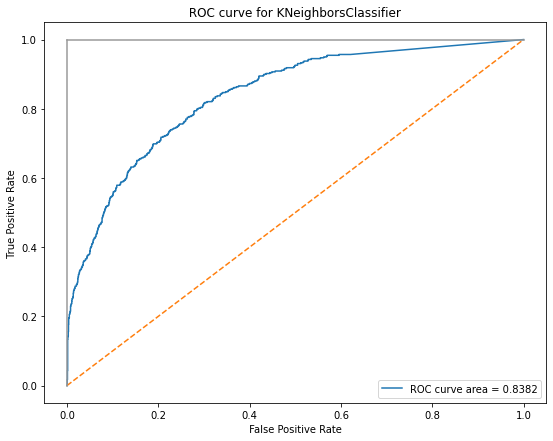

0.8382451360007648

In [86]:
# performing the KNN nodel

KNN = KNeighborsClassifier().set_params(**best_params)

# testing the model's performance 
model_testing( KNN, train_normalize, train_labels, X_test_normalize, y_test)


<br><br>
# Logistic Regression
<br>Using grid search for finding the ideal parameters-

define paramaters to search over and their values.  
**The default parameters -** <br>(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,
class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False,
n_jobs=None, l1_ratio=None)


***explantation:***
We chose our parameters by the combination of grid search of the parameters : 'C','epsilon' and 'penalty', the others parameters we set as the default from the function documantion. 


In [87]:

log_reg_parameters = {'C': [num for num in range(1,50,10)], 'penalty':[ 'l1', 'l2', 'elasticnet', 'none' ],'dual':[False],'tol':[0.0001],'fit_intercept':[True],'intercept_scaling':[1]\
                 ,'class_weight':[None],'random_state':[None],'solver':['lbfgs'],'max_iter':[100],'multi_class':['auto'],'verbose':[0],'warm_start':[False],\
                    'n_jobs':[1,-1],'l1_ratio':[None]}

Gs_log_reg = GridSearchCV( LogisticRegression(), log_reg_parameters ).fit( train_normalize, train_labels )

# finding the best set of parameter values to train the model on.

best_estimator = Gs_log_reg.best_estimator_
best_params = Gs_log_reg.best_params_

print(f'Best Params: {best_params} \n')



Best Params: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': 1, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 



After we found the best set of parameter values to train the model we can check the auc
with those parameters

The train auc is 0.8989405492678559
The test auc is 0.8860203208044882


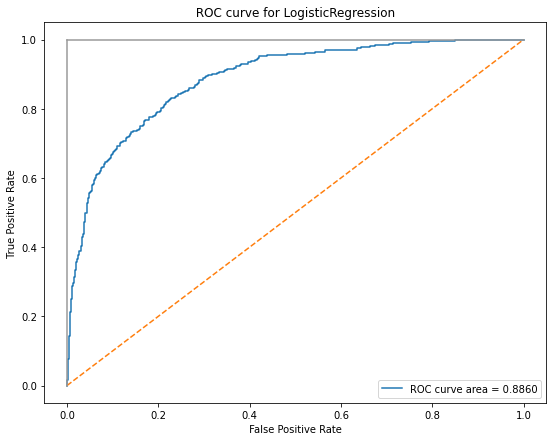

0.8860203208044882

In [88]:
# performing the Logistic Regression Model

logistic_regression = LogisticRegression().set_params(**best_params)

# testing the model's performance 

model_testing( logistic_regression, train_normalize, train_labels, X_test_normalize, y_test )


<br>
<br>

# Multi-Layer Perceptron (ANN)
<br>Using grid search for finding the ideal parameters-
<br><br>
define paramaters to search over and their values.  <br>
**The default parameters -**<br>(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)



***explanation:***

We chose our parameters by the combination of grid search of the parameters : 'max_iter' and 'epsilon', the others parameters we set as the default from the function documantion. 



In [89]:
MLP_parameters = { 'hidden_layer_sizes':[(40,), (60,)],'alpha':[0.0001],'batch_size':['auto'],'learning_rate':['constant'],'learning_rate_init':[0.001]\
     ,'power_t':[0.5], 'max_iter': [200], 'shuffle':[True], 'random_state':[None], 'tol':[0.0001], 'verbose':[False], 'warm_start':[False]\
         ,'momentum':[0.9], 'nesterovs_momentum':[True],'early_stopping':[False], 'validation_fraction':[0.1], 'beta_1':[0.9],'beta_2':[0.999],\
                  'solver':[ 'adam'], 'activation': ['relu'],'epsilon':[ 1e-5, 1e-6 ], 'n_iter_no_change':[10], 'max_fun':[15000]} 

Gs_MLP = GridSearchCV( MLPClassifier(), MLP_parameters ).fit( train_normalize, train_labels )

# finding the best set of parameter values to train the model on.

best_estimator = Gs_MLP.best_estimator_
best_params = Gs_MLP.best_params_

print(f'Best Params: {best_params} \n')



Best Params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-06, 'hidden_layer_sizes': (40,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False} 



After we found the best set of parameter values to train the model we can check the auc
with those parameters

The train auc is 0.9513323562088368
The test auc is 0.9113376704083718


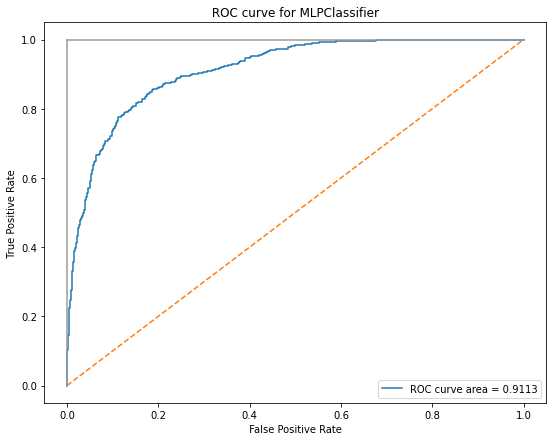

0.9113376704083718

In [90]:
# performing the Multi-Layer Perceptro Model

MLP_clf = MLPClassifier().set_params(**best_params)

# testing the model's performance 

model_testing( MLP_clf, train_normalize, train_labels, X_test_normalize, y_test)


<br><br><br>
# Random Forest
Using grid search for finding the ideal parameters-
<br><br>
define paramaters to search over and their values.  <br>
**The default parameters -** <br>
(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)



***explanation:***

We chose our parameters by the combination of grid search of the parameters : 'criterion', 'min_samples_split' and 'max_depth', the others parameters we set as the default from the function documantion. 



In [91]:
# define paramaters to search over and their values.  

rf_parameters ={'n_estimators':[1000], 'criterion':['entropy'],\
                'max_depth': [6,7], 'min_samples_split':[4,5],\
                'min_samples_leaf': [1], 'min_weight_fraction_leaf':[0.0],\
                'max_features': ['log2'], 'max_leaf_nodes':[None],\
                'min_impurity_decrease' :[0.0],"min_impurity_split":[None], 'bootstrap':[True], 'oob_score':[False], 'n_jobs':[None],\
                'random_state': [0], 'verbose':[0], 'warm_start':[False], 'class_weight':[None],\
                'ccp_alpha':[0.0], "max_samples":[None]}

Gs_rf = GridSearchCV(RandomForestClassifier(), rf_parameters).fit(d_train, train_labels)

# finding the best set of parameter values to train the model on.

best_estimator = Gs_rf.best_estimator_
best_params = Gs_rf.best_params_

print(f'Best Params: {best_params} \n')

Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False} 



The train auc is 0.9585415217964703
The test auc is 0.9251050589068658


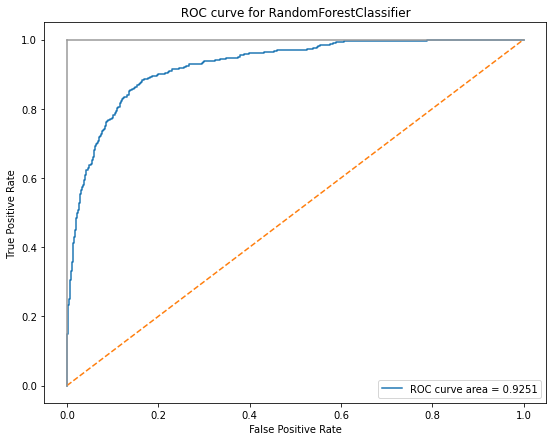

0.9251050589068658

In [95]:
# performing the Random Forest Model
             
rf_clf = RandomForestClassifier().set_params(**best_params)
# testing the model's performance 
model_testing(rf_clf, d_train, train_labels, d_test, y_test)


After we found the best set of parameter values to train the model we can check the auc
with those parameters

Now that we've seen all the models' performances, <br> 
## let's choose the best model!<br> 
**Random Forest** is well known for great results and is used often in the industry. <br> 
As in here, it gives us the best performance. We would like to proceed with it for the rest of the project.  <br><br>


## Feature Importance
<br>
After performing the models and finding what each AUC score is, we can now try to explain who are the key features that influence the model the most.<br><br>
We created a function that will help us understand better the average importance of each feature. 
<br> It will be on the random forest classifier( rf_clf ) we created earlier hence the importance may change between the models.<br>

*Let's get to it!*

In [96]:
# function for the average importance of each feature
def kf_feature_importance(train_data, labels, k):
    """
    This functions checks using K-fold for the average importance of each feature. 
    We use the Random Forest classifier we used prior.
    The K parameter is the number of splits in the K-fold.
 
    """
    X = train_data.copy() 
    y = labels.copy() 

    kf = KFold(n_splits = k, random_state = None, shuffle = False)
     
    dict_ = {}
    for train_range, validation_range in kf.split(X):

        # splitting the data into train and validation acorrding to the k split


        X_t, X_v = X.iloc[train_range], X.iloc[validation_range]
        y_t, y_v = y.iloc[train_range], y.iloc[validation_range]

        X_train, X_validation = X_t.copy(), X_v.copy()
        y_train, y_validation = y_t.copy(), y_v.copy()

        X_train, X_validation = pre_processing(X_train, X_validation, y_train )

        # Create a Decision tree classifier
        tree = rf_clf
        # Train the classifier
        tree = tree.fit(X_train, y_train)

        # Get the feature's importance
        importances = tree.feature_importances_
        indices = np.argsort(importances)[::-1]

        for i, feature in enumerate(X_train.columns[indices]):
            dict_[feature] = dict_.get(feature,0) + importances[indices][i]*100

    for w in dict_.keys():
        dict_[w] = dict_[w] / k 

    sorted_keys = sorted(dict_, key=dict_.get, reverse = True)  # [1, 3, 2]

    plt.figure(figsize=(10,7))
    plt.title('Feature importance - Desecion Tree (rf_clf)')
    plt.bar(range(X_train.shape[1]), [val for val in dict_.values()],
           color="r", align="center")
    plt.xticks(range(X_train.shape[1]), sorted_keys, rotation='vertical')
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

    # Print the feature ranking
    print("Feature ranking:")
    for i,w in enumerate(sorted_keys):
        print(("{}. {} ({:.2f}%)").format(i+1, sorted_keys[i], dict_[sorted_keys[i]]))


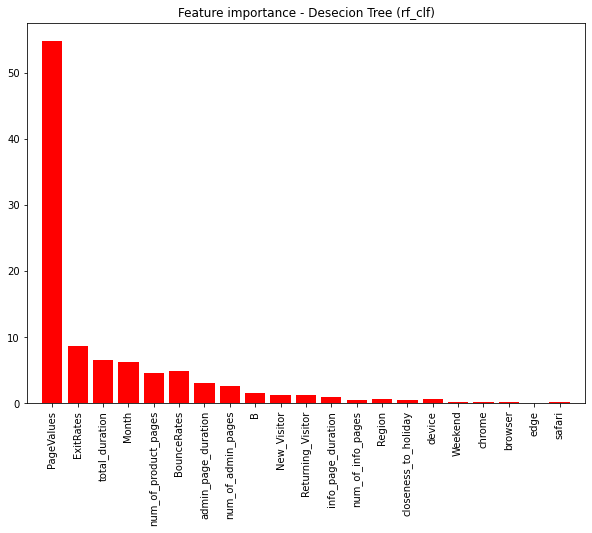

Feature ranking:
1. PageValues (54.78%)
2. ExitRates (8.75%)
3. total_duration (6.60%)
4. Month (6.28%)
5. num_of_product_pages (4.88%)
6. BounceRates (4.62%)
7. admin_page_duration (3.11%)
8. num_of_admin_pages (2.62%)
9. B (1.63%)
10. New_Visitor (1.29%)
11. Returning_Visitor (1.24%)
12. info_page_duration (0.97%)
13. num_of_info_pages (0.63%)
14. Region (0.62%)
15. closeness_to_holiday (0.57%)
16. device (0.57%)
17. Weekend (0.23%)
18. chrome (0.19%)
19. browser (0.16%)
20. edge (0.14%)
21. safari (0.14%)


In [97]:
kf_feature_importance(train_data, labels, 10)

The plot above based on random forest model <br> <br>


We can see the top 4 important features are: <br>
1. PageValues with importance of almost 55%% <br>
2. ExitRates of importance of 8.75% <br>
3. total_duration with importance of 6.60% <br>
4. Month with importance of 6.28% <br>


1. ***'PageValues'*** is a Google Analytics measure that contain the average value of a page a user visiting before landing on the goal page or compliting an E-comerce transaction (or both) <br>
Hence, it makes sense that 'PageValues' is the most important feature because of his meaning. <br>
If some page has a high value it means that there is more chance that the session will ending with buying because in average a<br> lot of users bought after landing this page. <br>
So, if there is a visit in a page with high value it's mean that there is a good chance that after the visit the session will ending with purchasing. <br>
We can't deny that the result suprise us, we were expected that the 'PageValues' feature has big impact in the result of the <br>session but we didn't expected for so high impcat of almost 50%. <br><br>
 
2. ***'ExitRates'*** is a Google Analytics measure for precentage of users who left the site from a specific page. <br>
We expected that  pages with high 'ExiteRates' will have negative impact of the propabilty of some session ending with purchase. <br>
This measure has strong meaning because if there is some page with very high 'ExitRates' so by average most of the users leave<br> the website after the session and didn't do any purchase. <br>
Hence it didn't make us suprised that this feature has strong impact on the model. <br><br>

3. ***'total_duration'*** - this feature's related to the duration of the session for each user.<br>
We noted those features have a perfect correlation of 0.99 so it don't suprised us that the have almost the same importance.<br><br>
These features have both of 6.5% of importance of the total importance it makes sense because rationally if some user spend more<br> time in the session is can attest to his seriousness about the related<br>
product and the consideration of buying it. <br><br>

4. The meaning of ***'Month'*** feature is in which month the session occur, It makes sense that this feature has strong impact on <br>the model. <br> 
It's well known that there are some months in the year that more pepole more likley to buy online, like months with long <br>holidays, month that attribute with special sales and more...
<br> 

[Get back to the top ](#top3)


# Part 4 - Model Evaluation <a class="anchor" id="Part4"></a>


### Matrix Confusion- 
#### RandomForest model

In [98]:
# How to plot a confusion Matrix 
# Using sklearn

# change test_labels, test_pred
def confusion_matrix_plot(test_labels, test_prediction):
    cm = confusion_matrix(test_labels, test_prediction)
    tn, fp, fn, tp = cm.ravel()
    cm = np.array([[tn,fp],[fn,tp]])
    plt.title('RandomForest confusion matrix')
    sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',xticklabels = ['True_Not_purchased','True_purchased'], \
                yticklabels = ['Not_purchased','purchased'])
    
    


In [99]:

y_train = train_labels.copy().astype( int )
Y_test = y_test.copy().astype( int )

# fitting the model to the chosen clasiffier 
rf_clf.fit( d_train, y_train )

# predicting the model on the test
test_prediction = pd.Series(rf_clf.predict( d_test ))



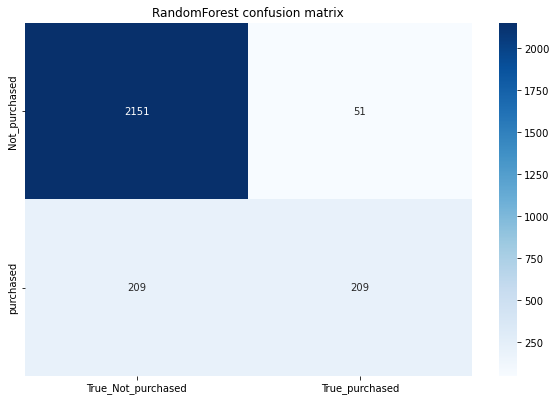

In [100]:

confusion_matrix_plot(Y_test,test_prediction)

#### Confusion Matrix <br>
*Each confusion matrix shows how the data was classified opposed to the actual labels:* <br><br>


* **True Negatives, Top Left :** In this cell we have the number of sessions that were  and predicted as 'not_purchase'. <br>

* **False Positive, Bottom Left :** In this cell we have the number of 'purchase' predictions while in fact their labels were 'not_purchase'. <br>

* **False Negatives, Top Right  :** In this cell we have the number of 'not_purchase' predictions while in fact their labels were 'purchase'. <br>

* **True Positives, Bottom Right  :** In this cell we have the number of sessions that were  and predicted as 'purchase' <br><br>

***In a confusion matrix,*** we aspire to have as less as *'FALSE_POSITIVE'* and *'FALSE_NEGATIVE'* predictions, and as many as *'TRUE_NEGATIVE'* and *'TRUE_POSITIVE'* predictions. <br><br>

**As we can see in our confusion matrix**, we significantly have less *'FALSE_POSITIVE'* and *'FALSE_NEGATIVE'* predictions and much more *'TRUE_NEGATIVE'* and *'TRUE_POSITIVE'* predictions.<br> <br>

***This is great news!*** It means our model can distinguish between the labels, although not perfect but in most cases, the model performs well. <br><br>

We can also see we barely have any *false negatives*- meaning our model predicts some users would not purchase at the end of the session, and a purchase indeed happened. <br>

Because of that, our model can be suitable for websites that *use many resources* when they believe there is a good chance of purchasing. <br>

Resources such as targeted advertisements, inventory, distribution, and shipping fees, all of that are to take into consideration as a part of the purchasing process. <br><br>





### K-Fold Cross Validation
<br>
In this part, we evaluate the model using Fold-K Cross Validation and build ROC output on each Fold-K for each of the run models.
It performs the pre-processing on each Fold-K train and validation. This results in better indication of the test results. 
<br>
we'll use a function that generates a ROC plot for each split in the KFold.<br>
that way we can see each folds preformences.


In [101]:
# Function that recieves a model, data and k, and generates a ROC plot for each split in the KFold
def k_folds_plot( clf, X, y, k ):
    """
    This function plots a ROC curve for each split in the KFold for a chosen model( clf ).
    Given the number k, it goes through all the splits from 1 to k.
    All the splits are in one plot, the red line is the auc mean of all the splits.
    
    """
    
    # for display, we want the name of the chosen model
    model_name = str(clf).split("(")[0]

    
    # setting the ground for our plot
    plt.figure()
    # using KFold, spliting the data into train and valisation to k splits
    kf = KFold(n_splits = k, random_state = None, shuffle = False)
    
    # setting the mean_true_positive_rate and mean_false_positive_rate to inital values-
    mean_true_positive_rate = 0.0
    
    mean_false_positive_rate = np.linspace(0, 1, 100)
    
    # starting our loop with 1 split till the k split
    num_split = 1
    
    auc_lst= []  ## list of the auc in the different k
    
    sum_auc = 0.0  ## sum of the auc of all the different k
     
    for train_range, validation_range in kf.split(X):
        
        # splitting the data into train and validation acorrding to the k split
  
        
        X_t, X_v = X.iloc[train_range], X.iloc[validation_range]
        y_t, y_v = y.iloc[train_range], y.iloc[validation_range]

        X_train, X_validation = X_t.copy(), X_v.copy()
        y_train, y_validation = y_t.copy(), y_v.copy()
       
        
        X_train, X_validation = pre_processing(X_train, X_validation, y_train )
     
        if model_name == "LogisticRegression" or model_name == 'KNeighborsClassifier' or model_name == 'MLPClassifier':
            scaler = StandardScaler()
            X_train = scaler.fit_transform( X_train )
            X_validation = scaler.fit_transform( X_validation )

        # fitting the model to the chosen clasiffier 
        clf.fit(X_train, y_train)        
        # predicting the model on the validation
        predict_prob = clf.predict_proba(X_validation)[:, 1]
        
        # getting the false and true positive rate and the threshhold from the roc_curve
        false_positive_rate, true_positive_rate, threshold = roc_curve( y_validation, predict_prob )
        mean_true_positive_rate += interp( mean_false_positive_rate, false_positive_rate, true_positive_rate )
         
        auc_ = auc( false_positive_rate, true_positive_rate ) ## The auc for this kfold
        
        # adding this auc to the auc list, and to the auc sum
        auc_lst.append( auc_ )
        sum_auc += auc_
        
        # setting the mean_true_positive_rate to it's original state for the next iteration
        mean_true_positive_rate[0] = 0.0
        
        print(f" Validating split number is { num_split } and it's auc is { auc_:.4f}")
        
         
        # plotting this iteration's results
        plt.plot( false_positive_rate, true_positive_rate, color = '#D3D3D3' )
        
        # for the next iteration, we want to increase the number of splits by 1
        num_split += 1 
    
    #start plotting
    plt.plot([0], [0], color='#D3D3D3', linestyle = '-', label='K-folds')
    
    # calculating the mean true_positive_rate
    mean_true_positive_rate /= k
    mean_true_positive_rate[-1] = 1.0
    # calculating the mean auc
    mean_auc = sum_auc / k
    
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.plot( mean_false_positive_rate, mean_true_positive_rate, color = 'red', linestyle='-', label = \
             f'Mean ROC - area = {mean_auc:.4f}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f" ROC curve for {model_name} ")
    plt.legend()
    plt.show()

In [102]:
# the models we want to use the above function on:
models= [rf_clf, logistic_regression, MLP_clf , KNN ]


In [103]:
def k_folds_models_plot( models, X, y, k ):
    """
    performing the k_folds_plot function on a list of given models 
    
    """
    print("ROC curve for the following models-")
    for clf in models:
        
        model_name = str(clf).split("(")[0]
        print("The " + model_name)
        k_folds_plot( clf, X, y, k )
    
    
    

ROC curve for the following models-
The RandomForestClassifier
 Validating split number is 1 and it's auc is 0.9865
 Validating split number is 2 and it's auc is 0.9749
 Validating split number is 3 and it's auc is 0.9866
 Validating split number is 4 and it's auc is 0.9748
 Validating split number is 5 and it's auc is 0.9287
 Validating split number is 6 and it's auc is 0.8786
 Validating split number is 7 and it's auc is 0.8717
 Validating split number is 8 and it's auc is 0.8738
 Validating split number is 9 and it's auc is 0.8927
 Validating split number is 10 and it's auc is 0.8707


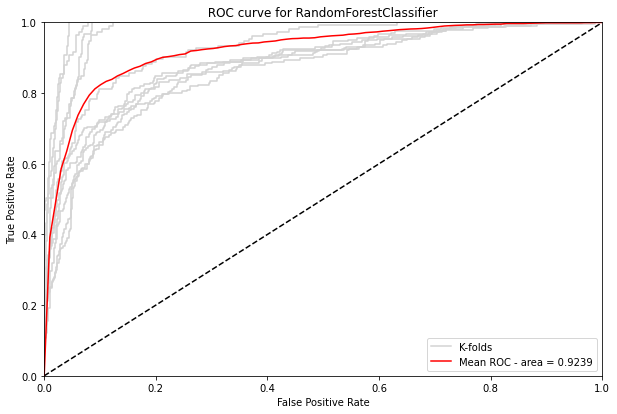

The LogisticRegression
 Validating split number is 1 and it's auc is 0.9656
 Validating split number is 2 and it's auc is 0.9309
 Validating split number is 3 and it's auc is 0.9619
 Validating split number is 4 and it's auc is 0.9555
 Validating split number is 5 and it's auc is 0.8700
 Validating split number is 6 and it's auc is 0.7804
 Validating split number is 7 and it's auc is 0.8463
 Validating split number is 8 and it's auc is 0.8445
 Validating split number is 9 and it's auc is 0.8804
 Validating split number is 10 and it's auc is 0.8447


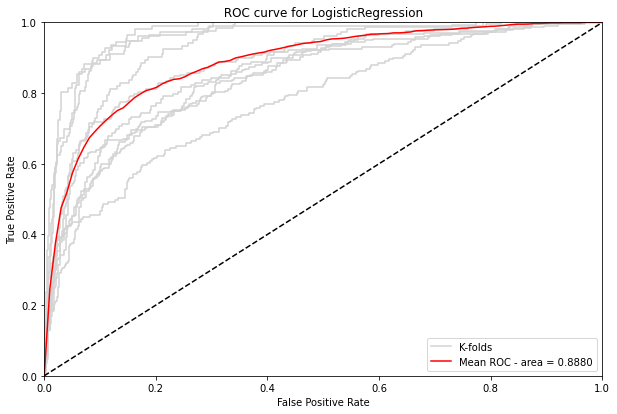

The MLPClassifier
 Validating split number is 1 and it's auc is 0.9654
 Validating split number is 2 and it's auc is 0.9555
 Validating split number is 3 and it's auc is 0.9810
 Validating split number is 4 and it's auc is 0.9626
 Validating split number is 5 and it's auc is 0.9170
 Validating split number is 6 and it's auc is 0.8535
 Validating split number is 7 and it's auc is 0.8577
 Validating split number is 8 and it's auc is 0.8357
 Validating split number is 9 and it's auc is 0.8748
 Validating split number is 10 and it's auc is 0.8390


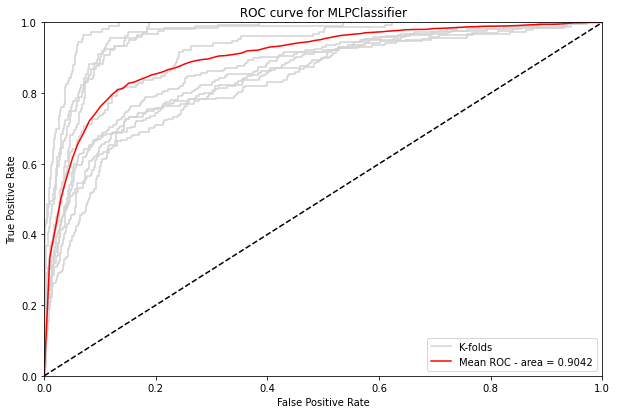

The KNeighborsClassifier
 Validating split number is 1 and it's auc is 0.9560
 Validating split number is 2 and it's auc is 0.8825
 Validating split number is 3 and it's auc is 0.9109
 Validating split number is 4 and it's auc is 0.9072
 Validating split number is 5 and it's auc is 0.8280
 Validating split number is 6 and it's auc is 0.7560
 Validating split number is 7 and it's auc is 0.8060
 Validating split number is 8 and it's auc is 0.7727
 Validating split number is 9 and it's auc is 0.8226
 Validating split number is 10 and it's auc is 0.7975


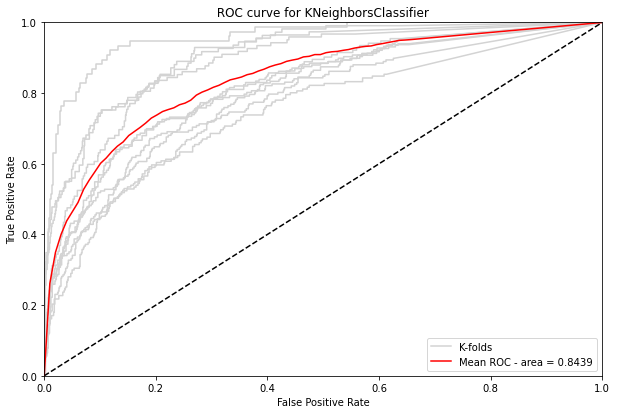

In [104]:
k_folds_models_plot( models, train_data, labels, 10)

<br><br>

# Are the models overfitted ?
<br>

While observing the k_folds_plot's plots, we can see that we have a range of 11% of accuracy between the highest model's performance to the lowest one. <br>
In general, our accuracy results are pretty good, the lowest one is 87%, while our best result is 99% of accuracy. <br>

So after seeing the AUC scores on each of our models, we want to ask ourselves- ***Are our models overfitted?*** <br>

One way to see overfitting is if the train's performance is much better than the tests. As we saw in the performance stage(without the K-Fold) the AUC difference between the train and test is within the normal. <br>
So it doesn't seem to overfit.<br>

But on the other hand, another way to see overfitting is to train our model on different data each time (train and validation). 
In this way, we can see if the model overfits itself to fit the specific data. Having a wide range of performances may indicate overfitting. <br> 
The K-FoldCV is a method that takes the data and divides it into k groups of test and validation. 
On each group of K-Fold, we perform the pre-processing each time, on the train and the validation. 
*This is crucial!* <br>
To simulate real results on different data, we must perform each K-Fold custom to the specific data. This allows us to see if the model truly overfits and to understand better what the test AUC mean will be. <br>
So, yes our model may overfit.


***To make sure our models are inclusive we did several things*** <br>

* We reduced dimensionality, removed small categories from categorical features, handled outliers, and preserved all the data by filling the missing values.<Br>
* In Addition, we split our training data into separate training and testing data. <br>
This meant our decision-making was influenced only by the training data. <br>
* We are also more aware of the overfitting issue and can pay attention to it by the method of the pre-processing as we did in the K-Fold_plot. <br>
 Taking the AUC mean of all the validations makes the distance from the accuracy that we expect to get to the one in the test to be smaller. <br>






[Get back to the top ](#top4)

# Part 5:  prediction <a class="anchor" id="Part5"></a>
<BR>
After selecting the ideal model, we need to make a prediction about the csv.test file data.
<br>But first lets remember how the test data looks like

In [105]:
test_data.head()

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,...,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0 minutes,2.0,64.0 minutes,NaN,0.00,0.10,0.0,...,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_2,92.487250,log200,NaN
1,0.0,0.0,0.0,0.0 minutes,2.0,2.666666667 minutes,NaN,0.05,0.14,0.0,...,Feb,3.0,chrome_98.0.1,2.0,Returning_Visitor,False,c_4,120.493478,log400,NaN
2,1.0,0.0,0.0,0.0 minutes,0.0,NaN,0.0,0.20,0.20,0.0,...,Feb,1.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_5,94.120580,log400,NaN
3,0.0,NaN,0.0,0.0 minutes,2.0,32.0 minutes,32.0,0.00,0.10,0.0,...,Feb,2.0,chrome_90.1.7,1.0,Returning_Visitor,False,c_3,115.990484,log8080,NaN
4,0.0,0.0,0.0,0.0 minutes,4.0,63.0 minutes,NaN,0.00,0.05,0.0,...,Feb,2.0,browser_6_v12,1.0,Returning_Visitor,False,c_3,93.866618,log404,NaN


<br>
First, preparing the test_data for the prediction part is needed before further handeling

In [106]:

test_data = data_tidying(test_data)

train_data ,test_data = pre_processing( train_data, test_data, labels) #need to finish the function



#### we need now to fit and predict according to the model- random forest -

In [111]:

rf_clf.fit( train_data, labels )

# probabilities

predictions = rf_clf.predict_proba(test_data)[:, 1]

predictions_data = pd.DataFrame(index = test_data.index, data = predictions)
predictions_data.columns = ['Prediction Probabilities']



In [112]:
# Seeing the results-
predictions_data.head()

,Prediction Probabilities
id,
0,0.012665
1,0.006648
2,0.030945
3,0.012830
4,0.020403


In [113]:
# the number of each labels type:
predictions_data.round()['Prediction Probabilities'].value_counts()


0.0    1661
1.0     190
Name: Prediction Probabilities, dtype: int64

In [115]:
# making a csv for the predictions
predictions_data.to_csv( 'Submission_group_30.csv' )

[Get back to the top ](#top5)